PredictHR: Exploring and Forecasting Employee Attrition

Problem Statement :
Employees are the true foundation of every organization — their skills, motivation, and dedication shape the company’s success. Organizations invest a great deal of time, effort, and money in recruiting and nurturing their workforce. However, when employees decide to leave, especially those with critical expertise, it creates a major setback that affects both productivity and financial stability.

In recent years, many organizations have faced a steady rise in employee attrition, driven by a variety of reasons such as:
1)Inadequate salary and compensation structures
2)Limited career growth and promotion opportunities
3)Lack of recognition or appreciation for efforts
4)Poor managerial support or supervision
5)Restricted work-life balance and rigid policies
6)Underutilization of individual skills and potential

Aspirations to work with globally reputed companies

Such challenges not only increase recruitment and training costs but also disturb team dynamics, reduce morale, and hinder long-term growth.

If HR departments could predict which employees are likely to leave, they could take timely actions to address the root causes — by improving job satisfaction, offering better career opportunities, or enhancing engagement strategies. Predictive insights would also enable organizations to plan preventive hiring and design retention strategies more effectively.
This study focuses on identifying the major factors that influence employee attrition, including salary satisfaction, growth opportunities, work environment, recognition, and organizational policies. By applying data analytics and predictive modeling, the aim is to uncover actionable insights that can help companies strengthen retention, enhance employee satisfaction, and build a more stable workforce.

IMPORT THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#using seaborn style for graphs
plt.style.use("seaborn")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4420\527688765.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
#Loading and reading the dataset 
employee_df=pd.read_excel("Attrition.xlsx")

In [4]:
#Priting the head of data ensuring dataset is loaded properly or not
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Looking for any missing values
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

EXPLORATORY DATA ANALYSIS

In [7]:
#basic descriptive statistics
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
print("Dataset Shape:", employee_df.shape)

Dataset Shape: (1470, 35)


In [9]:
print("\nColumn Names:", employee_df.columns.tolist())


Column Names: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [10]:
print("\nUnique Values in Object Columns:")
for col in employee_df.select_dtypes('object').columns:
    print(f"{col}: {employee_df[col].nunique()}")


Unique Values in Object Columns:
Attrition: 2
BusinessTravel: 3
Department: 3
EducationField: 6
Gender: 2
JobRole: 9
MaritalStatus: 3
Over18: 1
OverTime: 2


In [11]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

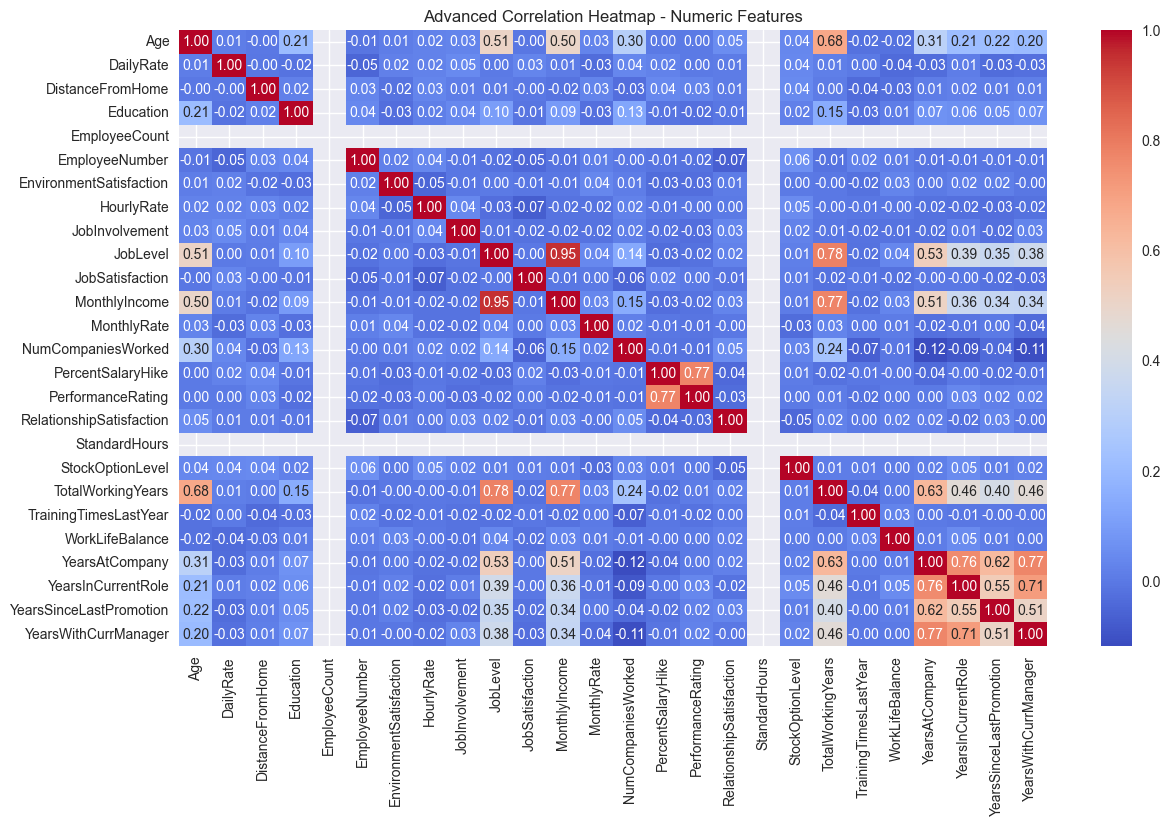

In [12]:
#Feature Correlation-Numerical
plt.figure(figsize=(14,8))
sns.heatmap(employee_df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Advanced Correlation Heatmap - Numeric Features")
plt.show()

The correlation analysis uncovers important patterns that help explain why employees stay or leave. There’s a strong link between Job Level and Monthly Income (0.95), meaning higher positions naturally bring higher pay. Similarly, Total Working Years correlates strongly with both Job Level (0.78) and Monthly Income (0.77), showing that experienced employees usually hold senior roles and earn better salaries. The close relationship between Years at Company, Years in Current Role, and Years with Current Manager (0.75–0.77) suggests that people often stay in the same role under the same manager for long periods — this reflects stability but may also hint at limited career growth opportunities.

Age is moderately correlated with Total Working Years (0.68) and Job Level (0.51), indicating that older employees tend to have more experience and higher positions. The strong correlation between Performance Rating and Percent Salary Hike (0.77) shows that pay raises are closely tied to performance, suggesting the organization rewards merit and hard work.

On the other hand, satisfaction-related factors like Job Satisfaction, Environment Satisfaction, Relationship Satisfaction, and Work-Life Balance have very weak or no correlation with salary, age, or experience. This means that simply offering good pay or senior roles may not guarantee happiness — employees also value appreciation, supportive management, and a healthy work culture.

Lastly, the heatmap highlights overlapping features such as Job Level, Monthly Income, and Total Working Years, which are so closely related that using them together in predictive models might cause confusion.In essence, the data shows that seniority, experience, and performance strongly influence income and promotions, but true satisfaction and retention depend on non-financial aspects — like recognition, growth opportunities, and a positive work environment. This underlines the need for companies to balance financial rewards with genuine employee engagement and support.

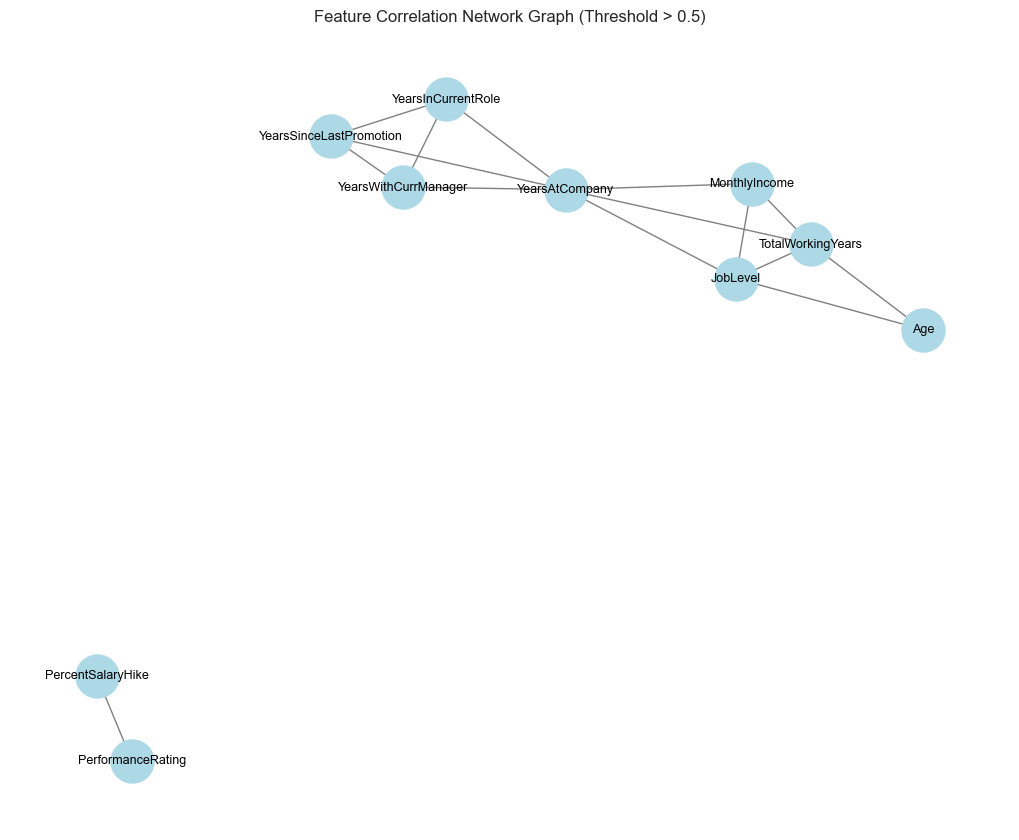

In [13]:
import networkx as nx

corr_matrix = employee_df.corr(numeric_only=True)
G = nx.Graph()

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > 0.5:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])

plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=9, edge_color='gray')
plt.title("Feature Correlation Network Graph (Threshold > 0.5)")
plt.show()


This Feature Correlation Network Graph (Threshold > 0.5) visually highlights how different employee-related factors are interlinked. Each node represents a feature, and the connecting lines (edges) indicate strong correlations (above 0.5).

From the graph, two major clusters stand out:

1)Experience and Career Progression Cluster:
The largest cluster includes Age, Job Level, Monthly Income, Total Working Years, and Years at Company, all tightly connected. This shows that as employees grow older and gain more experience, they typically hold higher positions and earn more — confirming that seniority and experience are key drivers of career growth and compensation. Within this group, Years in Current Role, Years Since Last Promotion, and Years with Current Manager are also linked to Years at Company, reflecting organizational stability but limited internal movement. Employees tend to stay under the same manager and role for years, which can lead to stagnation if promotions are infrequent.

2)Performance–Reward Cluster
A smaller but significant connection exists between Performance Rating and Percent Salary Hike, indicating a performance-based reward structure. Employees who perform better tend to receive higher raises, reinforcing the company’s merit-driven compensation approach.

Interestingly, there’s no strong connection between satisfaction-related attributes (like job satisfaction or work-life balance) and these numerical features, implying that emotional engagement is independent of salary, role, or experience.this network graph reinforces the findings from the correlation heatmap — career growth, experience, and performance are strongly interconnected, while employee satisfaction depends on non-financial and cultural factors. To reduce attrition, organizations should maintain fair pay and growth opportunities while also improving recognition, leadership support, and internal mobility to keep employees motivated and loyal.

In [14]:
## basic descriptive statistics
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


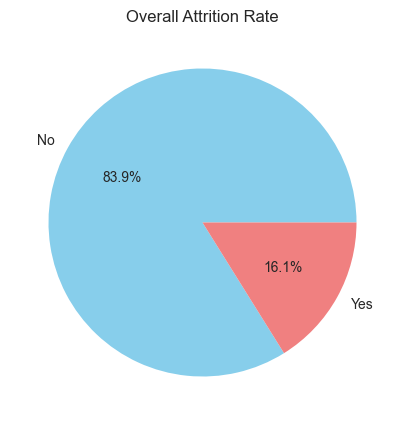

In [15]:
# --- Attrition Distribution ---
plt.figure(figsize=(6,5))
employee_df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Overall Attrition Rate")
plt.ylabel('')
plt.show()

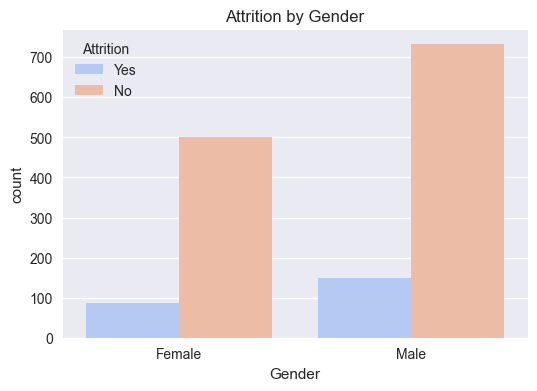

In [16]:
# --- Attrition by Gender ---
plt.figure(figsize=(6,4))
sns.countplot(data=employee_df, x='Gender', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Gender")
plt.show()

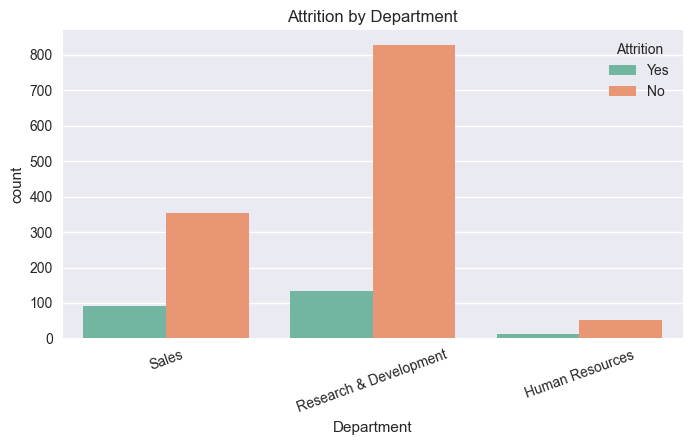

In [17]:
# --- Attrition by Department ---
plt.figure(figsize=(8,4))
sns.countplot(data=employee_df, x='Department', hue='Attrition', palette='Set2')
plt.title("Attrition by Department")
plt.xticks(rotation=20)
plt.show()

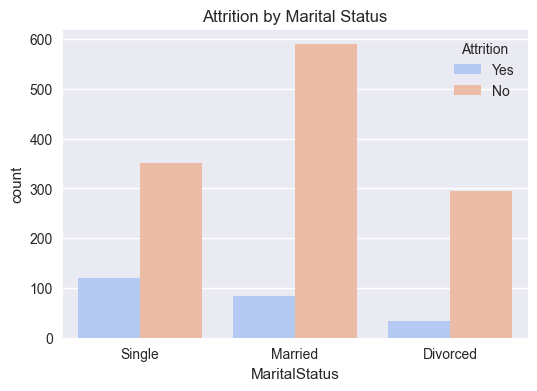

In [18]:
# --- Attrition by Marital Status ---
plt.figure(figsize=(6,4))
sns.countplot(data=employee_df, x='MaritalStatus', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Marital Status")
plt.show()

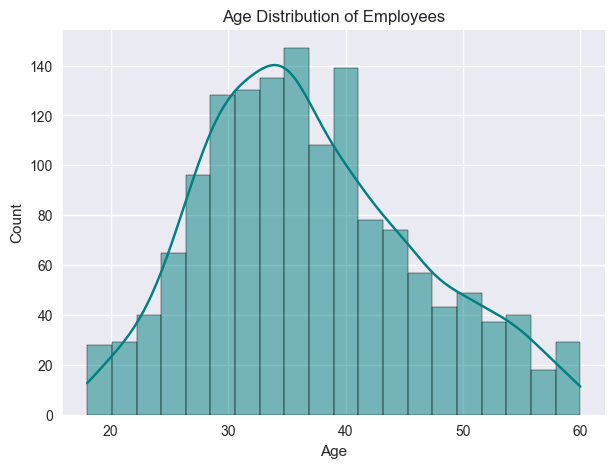

In [19]:
# --- Age Distribution ---
plt.figure(figsize=(7,5))
sns.histplot(employee_df['Age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution of Employees")
plt.show()

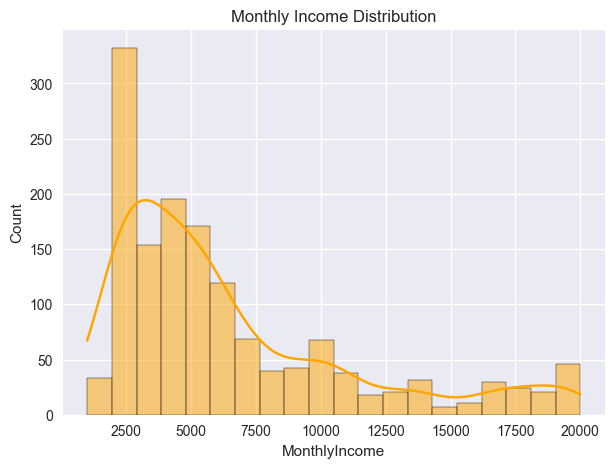

In [20]:
# --- Monthly Income Distribution ---
plt.figure(figsize=(7,5))
sns.histplot(employee_df['MonthlyIncome'], bins=20, kde=True, color='orange')
plt.title("Monthly Income Distribution")
plt.show()

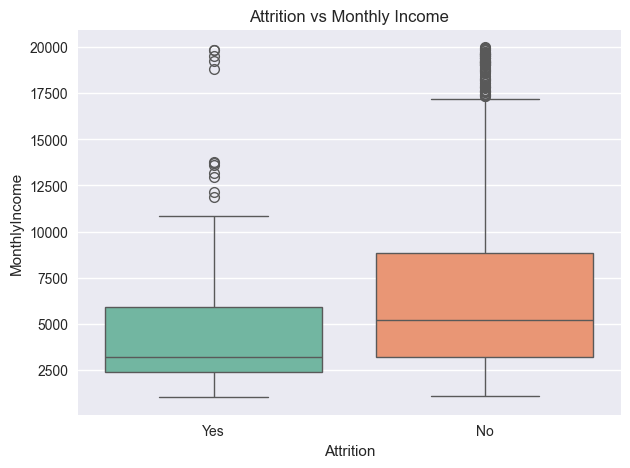

In [21]:
# --- Attrition vs Monthly Income ---
plt.figure(figsize=(7,5))
sns.boxplot(data=employee_df, x='Attrition', y='MonthlyIncome', palette='Set2')
plt.title("Attrition vs Monthly Income")
plt.show()

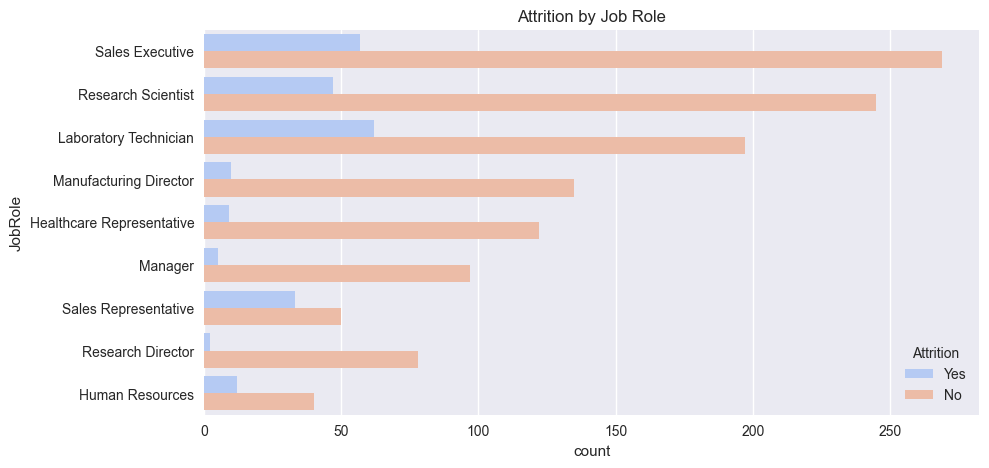

In [22]:
# --- Attrition vs Job Role ---
plt.figure(figsize=(10,5))
sns.countplot(data=employee_df, y='JobRole', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Job Role")
plt.show()

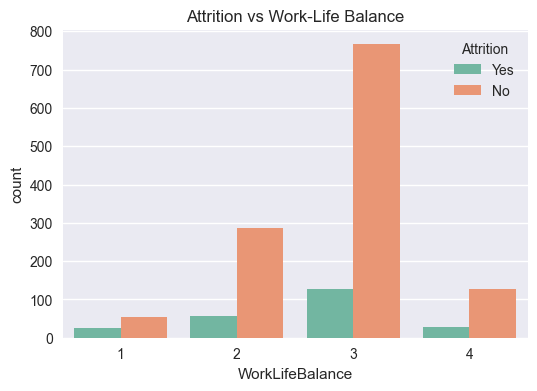

In [23]:
# --- Attrition vs Work-Life Balance ---
plt.figure(figsize=(6,4))
sns.countplot(data=employee_df, x='WorkLifeBalance', hue='Attrition', palette='Set2')
plt.title("Attrition vs Work-Life Balance")
plt.show()

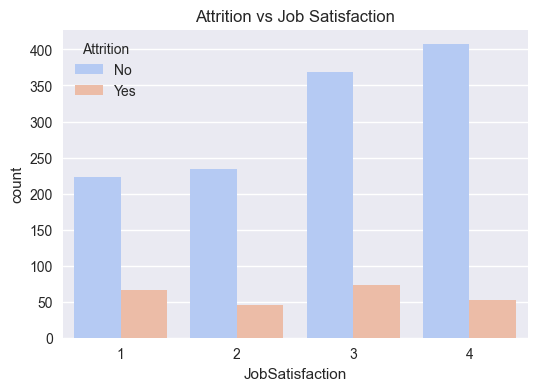

In [24]:
# --- Attrition vs Job Satisfaction ---
plt.figure(figsize=(6,4))
sns.countplot(data=employee_df, x='JobSatisfaction', hue='Attrition', palette='coolwarm')
plt.title("Attrition vs Job Satisfaction")
plt.show()

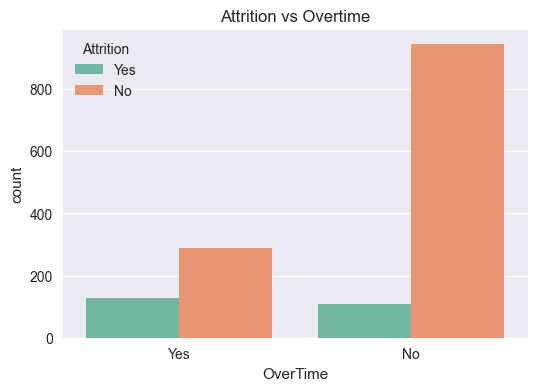

In [25]:
# --- Attrition vs Overtime ---
plt.figure(figsize=(6,4))
sns.countplot(data=employee_df, x='OverTime', hue='Attrition', palette='Set2')
plt.title("Attrition vs Overtime")
plt.show()

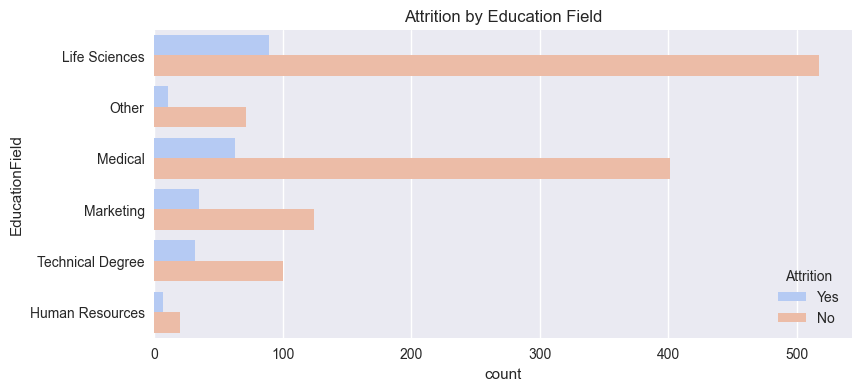

In [26]:
# --- Attrition vs Education Field ---
plt.figure(figsize=(9,4))
sns.countplot(data=employee_df, y='EducationField', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Education Field")
plt.show()

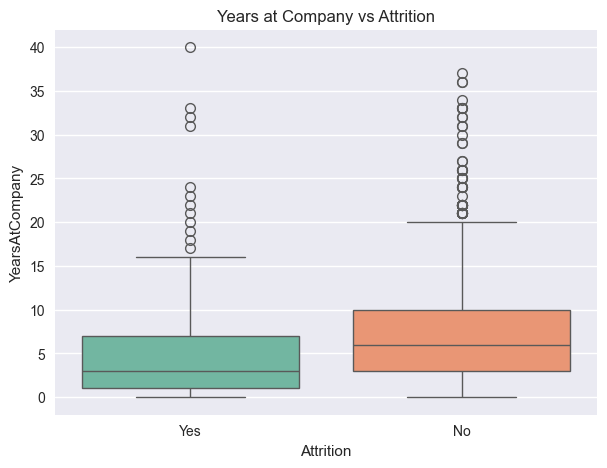

In [27]:
# --- Years at Company vs Attrition ---
plt.figure(figsize=(7,5))
sns.boxplot(data=employee_df, x='Attrition', y='YearsAtCompany', palette='Set2')
plt.title("Years at Company vs Attrition")
plt.show()

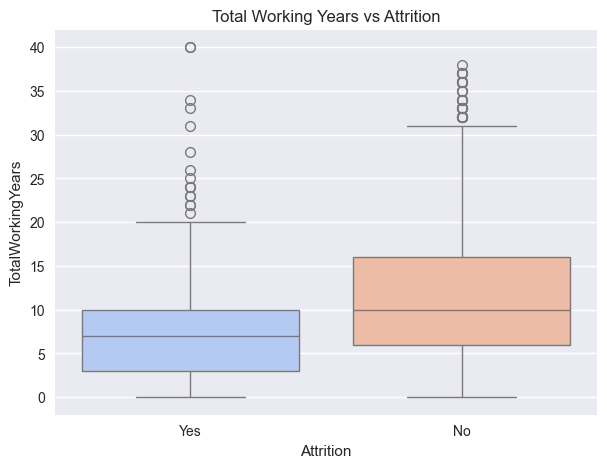

In [28]:
# --- Total Working Years vs Attrition ---
plt.figure(figsize=(7,5))
sns.boxplot(data=employee_df, x='Attrition', y='TotalWorkingYears', palette='coolwarm')
plt.title("Total Working Years vs Attrition")
plt.show()

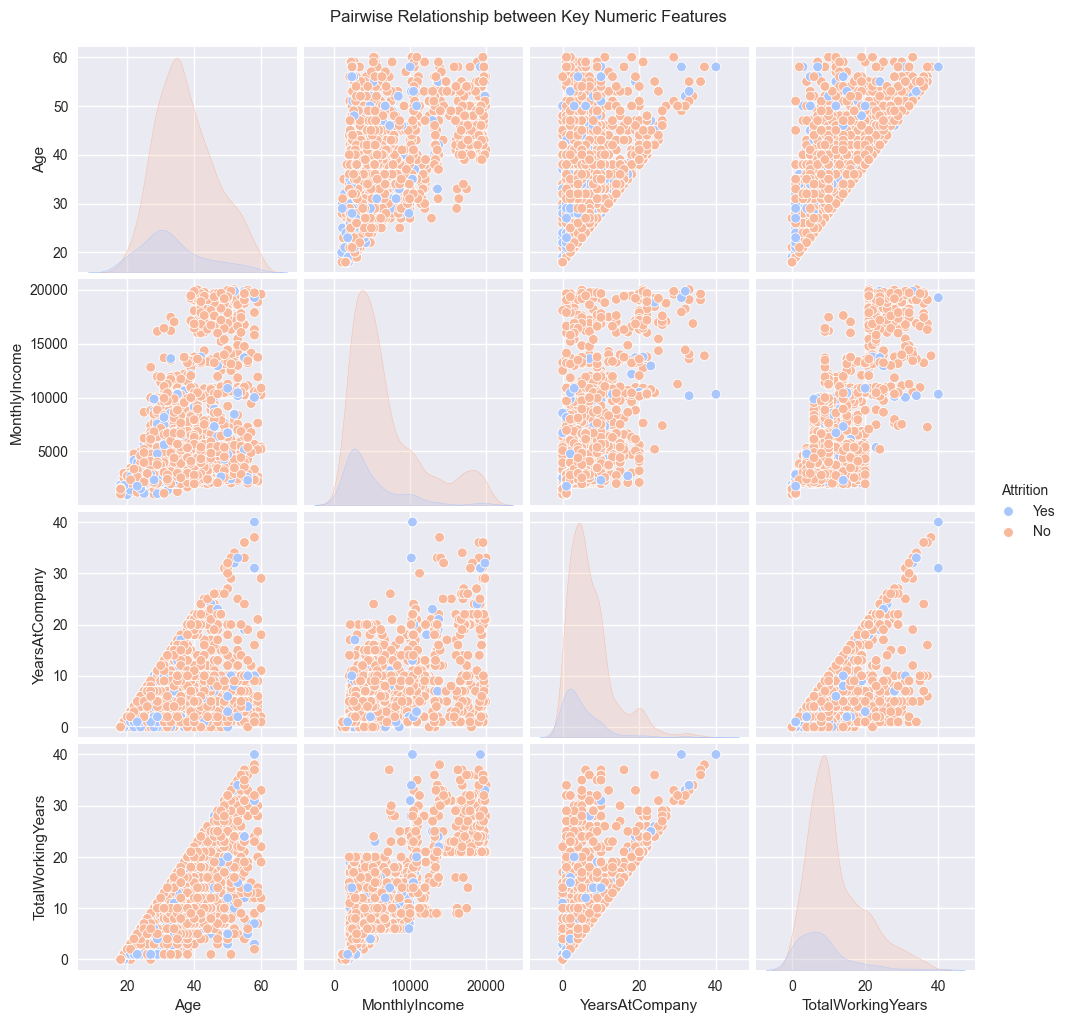

In [29]:
# --- Pairplot (for numerical relationship) ---
num_features = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears']
sns.pairplot(employee_df[num_features + ['Attrition']], hue='Attrition', palette='coolwarm')
plt.suptitle("Pairwise Relationship between Key Numeric Features", y=1.02)
plt.show()

EDA

In [30]:
## basic descriptive statistics
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [31]:
#Mapping the attrition 1 - yes and 0 - no in the new column

employee_df["left"] = np.where(employee_df["Attrition"] == "Yes",1,0)

In [32]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [33]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

This function NumericalVariables_targetPlots() visualizes how a numerical feature relates to employee attrition. It creates two side-by-side plots: a boxplot (showing how the numerical variable’s values differ between attrition groups — “Yes” vs “No”) and a distribution plot (showing the overall frequency of that variable in the dataset). Together, these plots help analyze whether a numerical factor (like age, income, or years at company) influences employee attrition patterns.

In [34]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

The function CategoricalVariables_targetPlots() is used to analyze how a categorical feature (like department, gender, or job role) impacts employee attrition.

It generates two plots side by side:

1)A count plot showing the distribution of employees across categories (e.g., how many in each department) with separate colors for “Attrition = Yes” and “No.”
2)A bar plot showing the average attrition rate for each category, highlighting which groups have higher turnover.

The parameter invert_axis allows you to switch between horizontal and vertical plots for better readability when category names are long.

ANALYIZING THE VARIABLES
1)Numerical Variables

---------AGE-----------

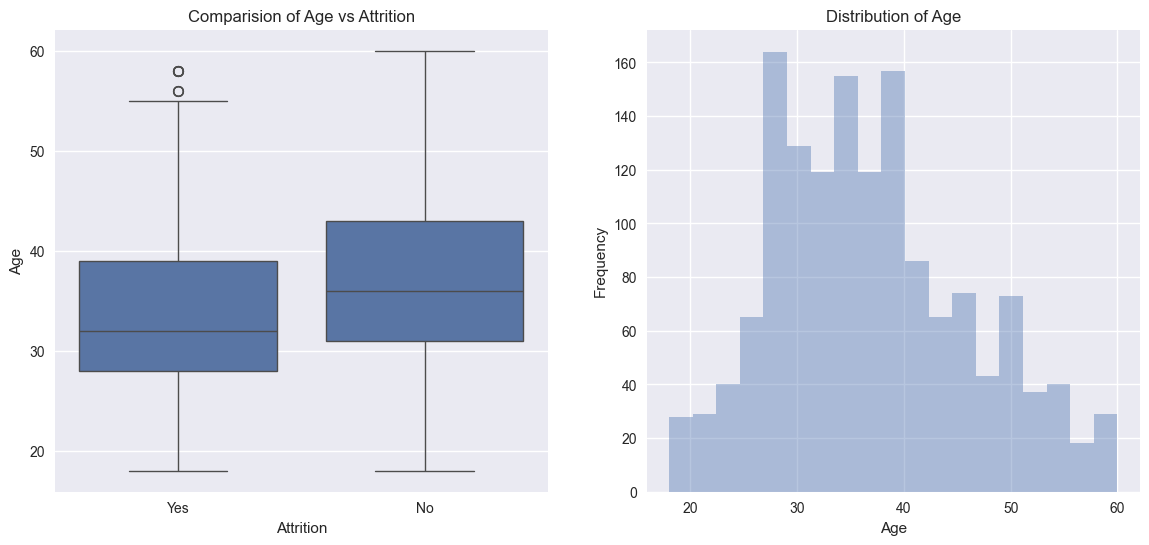

In [35]:

# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(employee_df,segment_by="Age")

-We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.
-From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't left the company are of age 32 to 40 years

---------Daily Rate & Montly Income & HourlyRate-----------

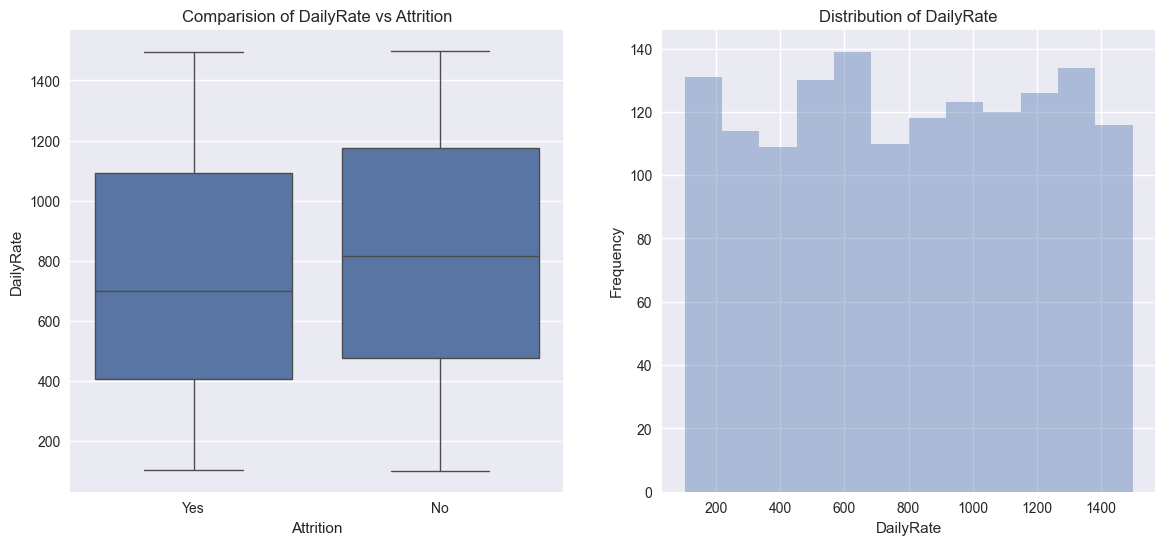

In [36]:
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(employee_df,"DailyRate")

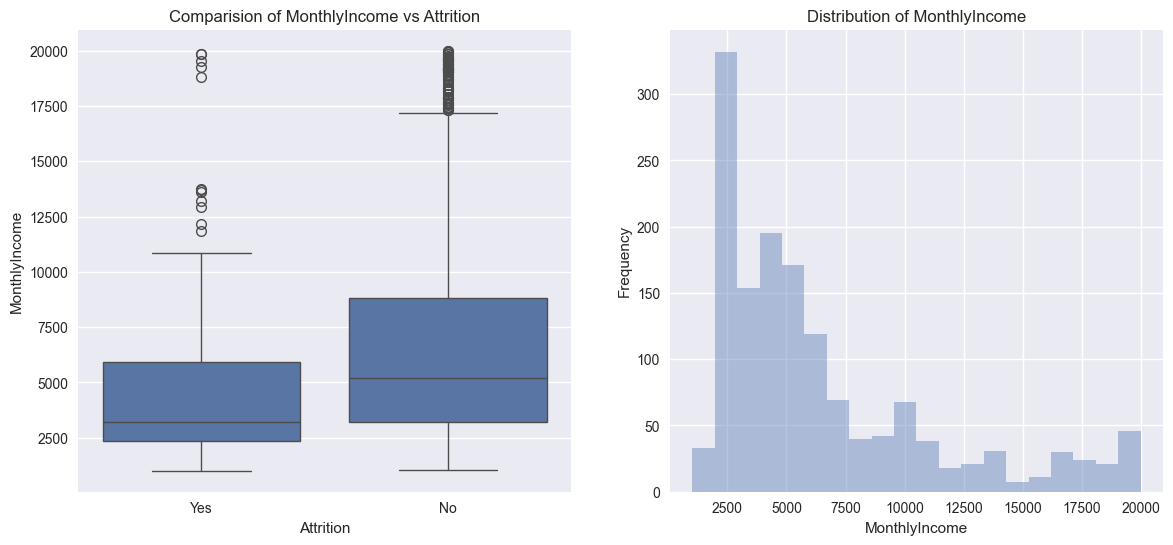

In [37]:
NumericalVariables_targetPlots(employee_df,"MonthlyIncome")

Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates. The same trend is resonated with monthly income too.

---------Hourly Rate-----------

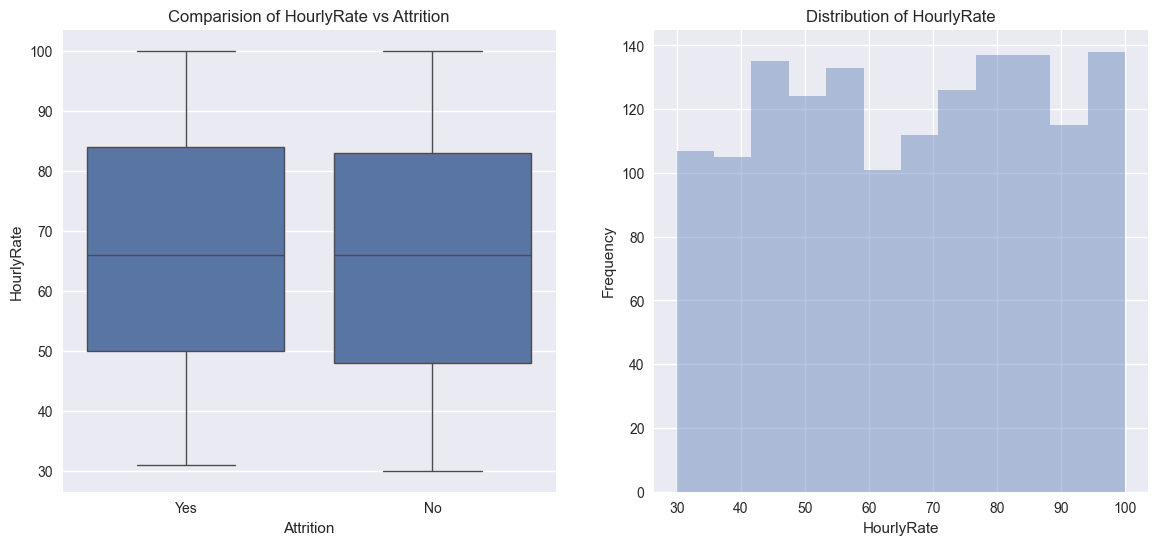

In [38]:
NumericalVariables_targetPlots(employee_df,"HourlyRate")

From plot we have seen that there is no significant difference in the hourly rate and attrition. Therefore hourly rate is considered as not signifcant to attrition.

---------PercentSalaryHike-----------

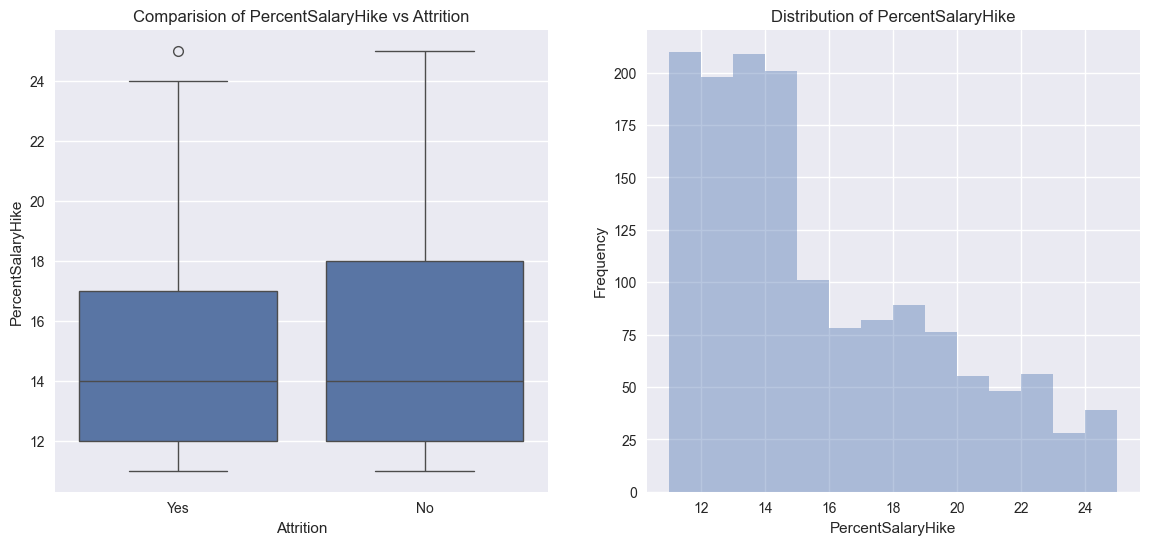

In [39]:
NumericalVariables_targetPlots(employee_df,"PercentSalaryHike")

Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

---------Total Working years-----------

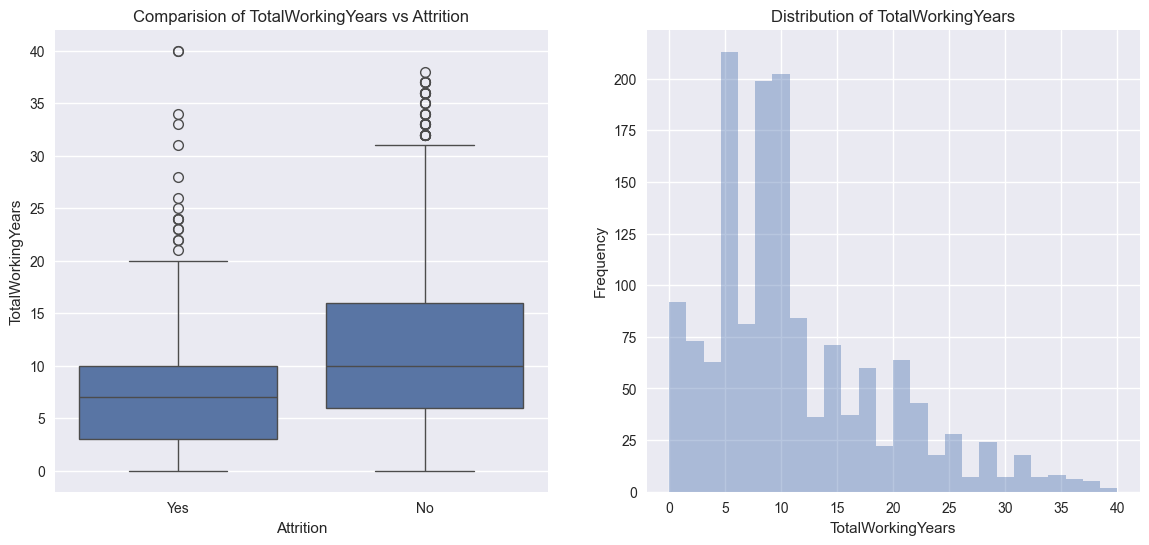

In [40]:
NumericalVariables_targetPlots(employee_df,"TotalWorkingYears")

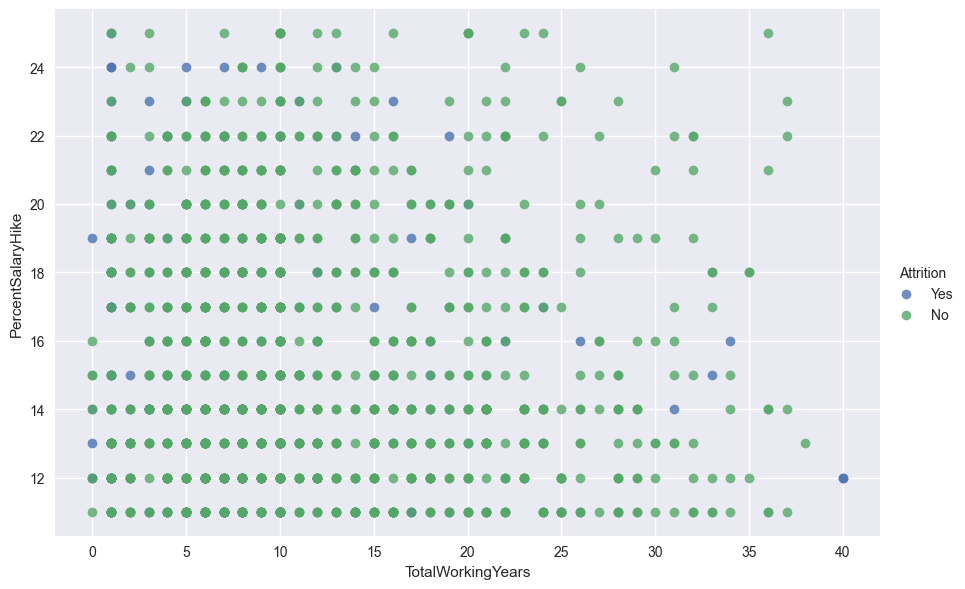

In [41]:
sns.lmplot(
    x="TotalWorkingYears",
    y="PercentSalaryHike",
    data=employee_df,
    fit_reg=False,
    hue="Attrition",
    height=6,     # replaced 'size' with 'height'
    aspect=1.5
)
plt.show()


--Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike.
--Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.
--Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike

---------Distance From Home-----------

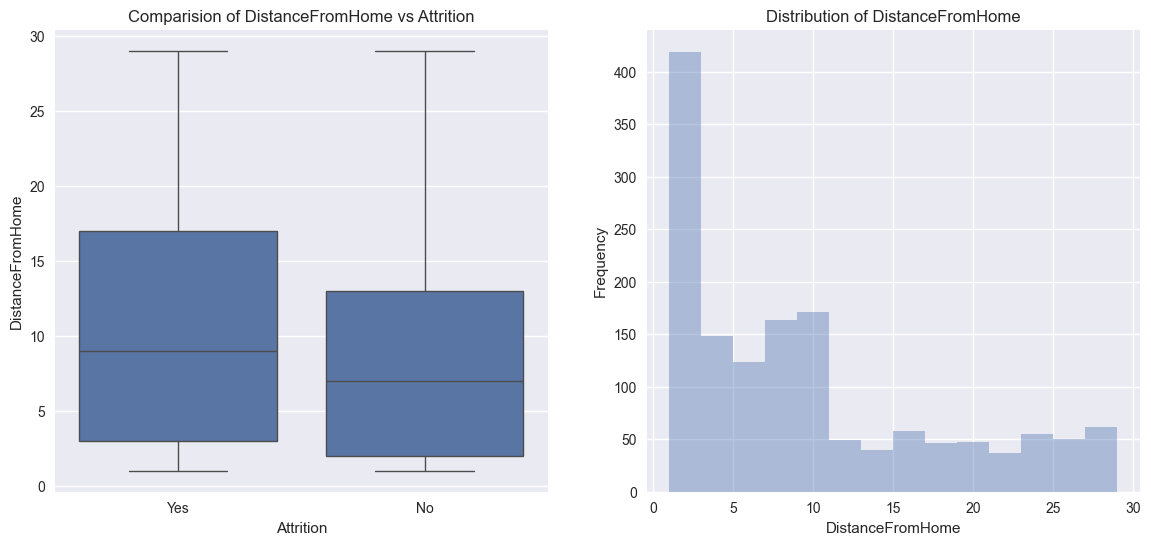

In [42]:
NumericalVariables_targetPlots(employee_df,"DistanceFromHome")

There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases

ANALYIZING THE VARIABLES
1)Categorical  Variables

----------------Job Involvement-----------------

In [43]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(employee_df.JobInvolvement,employee_df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [44]:
#calculating the percentage of people having different job involvement rate
round(employee_df.JobInvolvement.value_counts()/employee_df.shape[0] * 100,2)

JobInvolvement
3    59.05
2    25.51
4     9.80
1     5.65
Name: count, dtype: float64

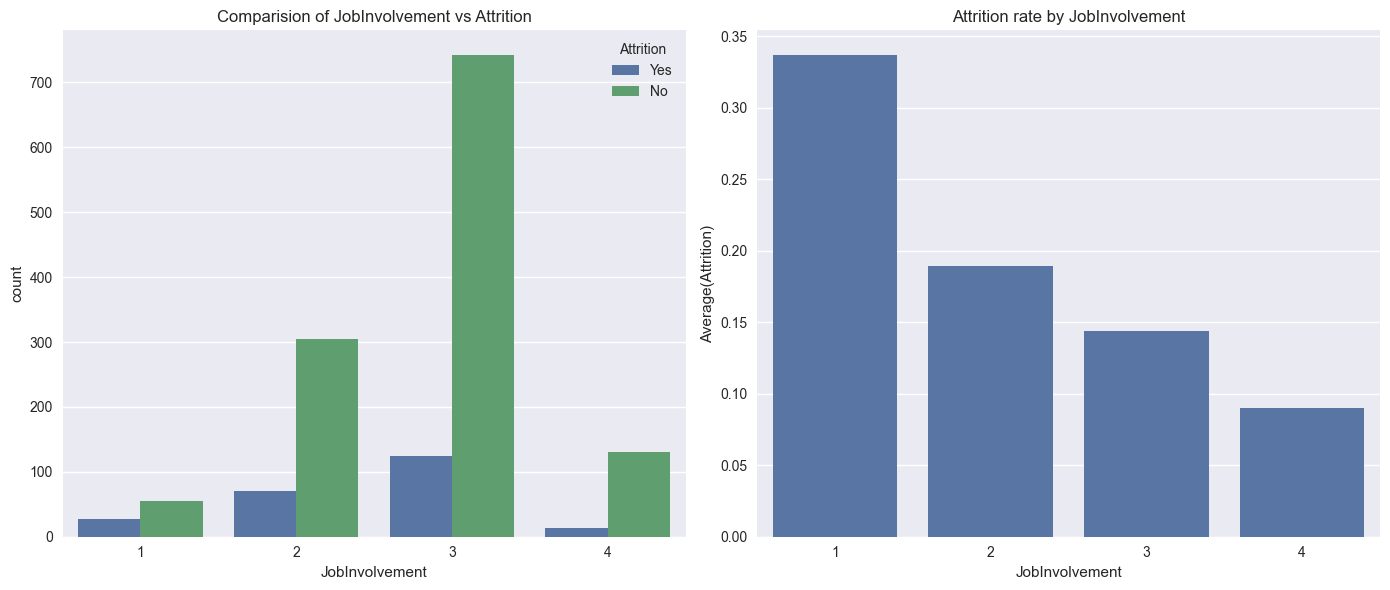

In [45]:
CategoricalVariables_targetPlots(employee_df,"JobInvolvement")


--In the total data set, 59% have high job involvement whereas 25% have medium involvement rate
--From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.
--Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company

-------------JobSatisfaction-----------

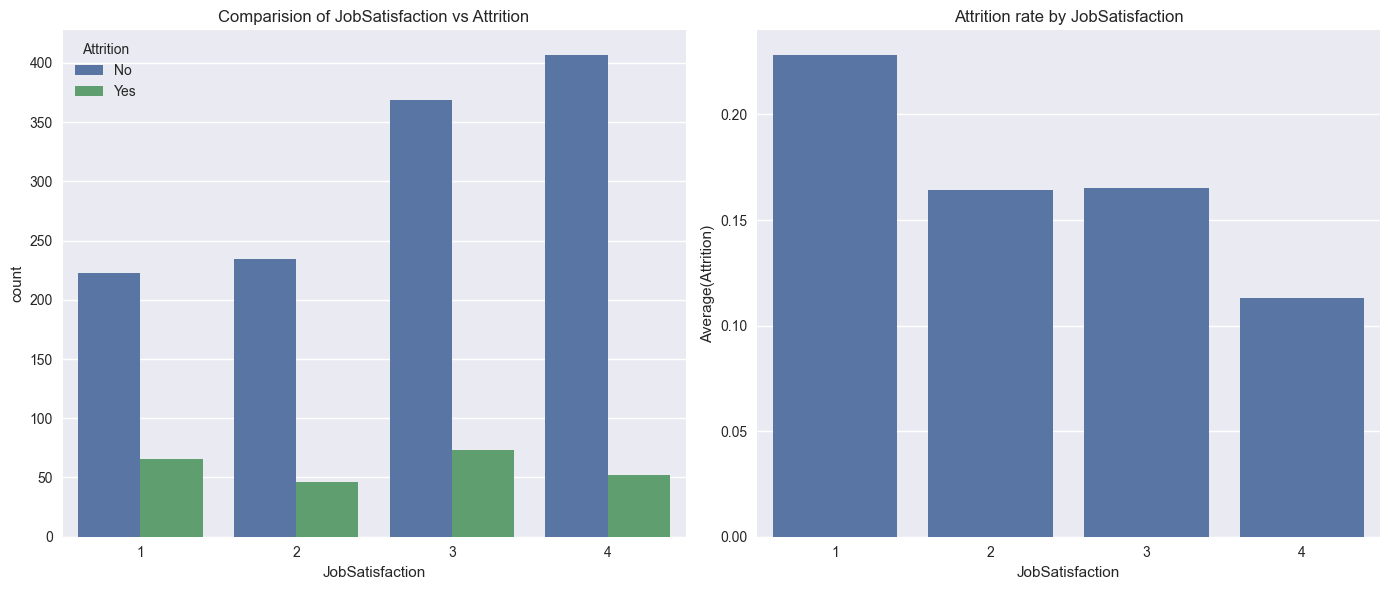

In [46]:
CategoricalVariables_targetPlots(employee_df,"JobSatisfaction")


As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

--------------Performance Rating----------------

In [47]:
#checking the number of categories under performance rating
employee_df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [48]:
#calculate the percentage of performance rating per category in the whole dataset
round(employee_df.PerformanceRating.value_counts()/employee_df.shape[0] * 100,2)

PerformanceRating
3    84.63
4    15.37
Name: count, dtype: float64

Around 85% of people in the company rated as Excellent and remaining 15% rated as Outstanding

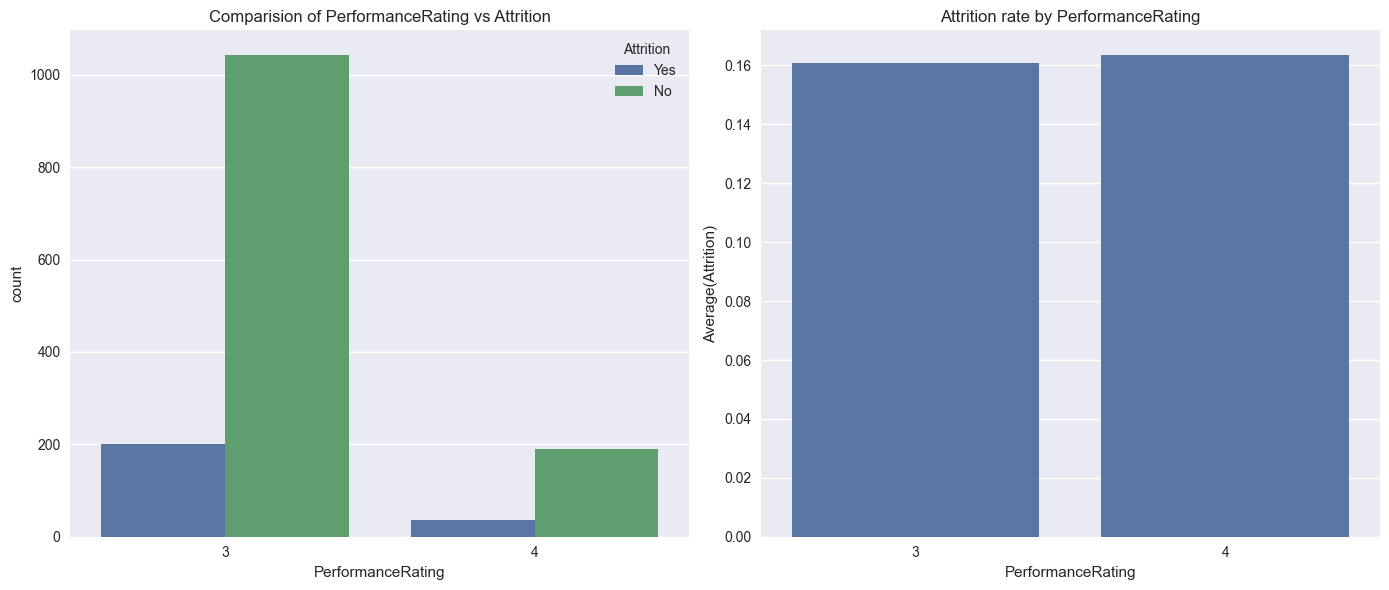

In [49]:
CategoricalVariables_targetPlots(employee_df,"PerformanceRating")

Contrary to normal belief that employee's having higher rating will not leave the company. It may be seen that there is no significant difference between the performance rating and Attrition Rate.

-----------------------RelationshipSatisfaction--------------------

In [50]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'left'],
      dtype='object')

In [51]:
#percentage of each realtionship satisfaction category across the data
round(employee_df.RelationshipSatisfaction.value_counts()/employee_df.shape[0],2)

RelationshipSatisfaction
3    0.31
4    0.29
2    0.21
1    0.19
Name: count, dtype: float64

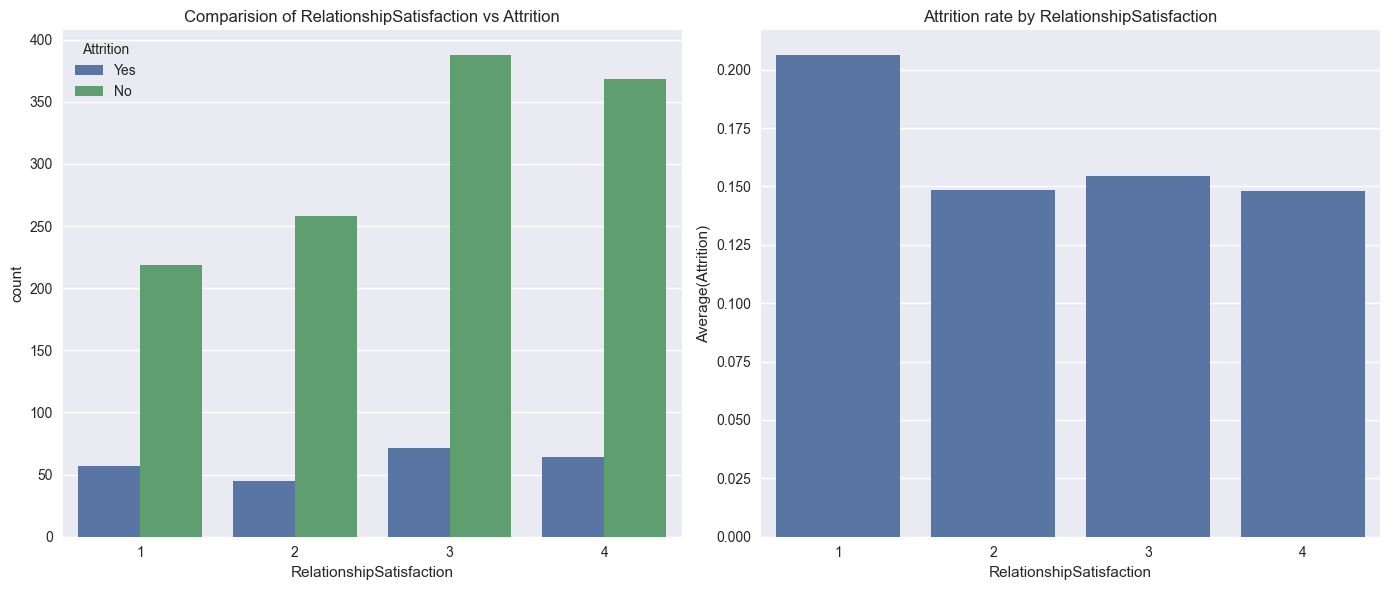

In [52]:
CategoricalVariables_targetPlots(employee_df,"RelationshipSatisfaction")


In this too, we found that almost 30% of employees with high and very high RelationshipSatisfaction have left the company. Here also there is no visible trend among the relationshipsatisfaction and attrition rate.

----------------WorkLifeBalance----------

In [53]:
#percentage of worklife balance rating across the company data
round(employee_df.WorkLifeBalance.value_counts()/employee_df.shape[0],2)

WorkLifeBalance
3    0.61
2    0.23
4    0.10
1    0.05
Name: count, dtype: float64


More than 60% of the employee's rated that they have Better worklife balance and 10% rated for Best worklife balance

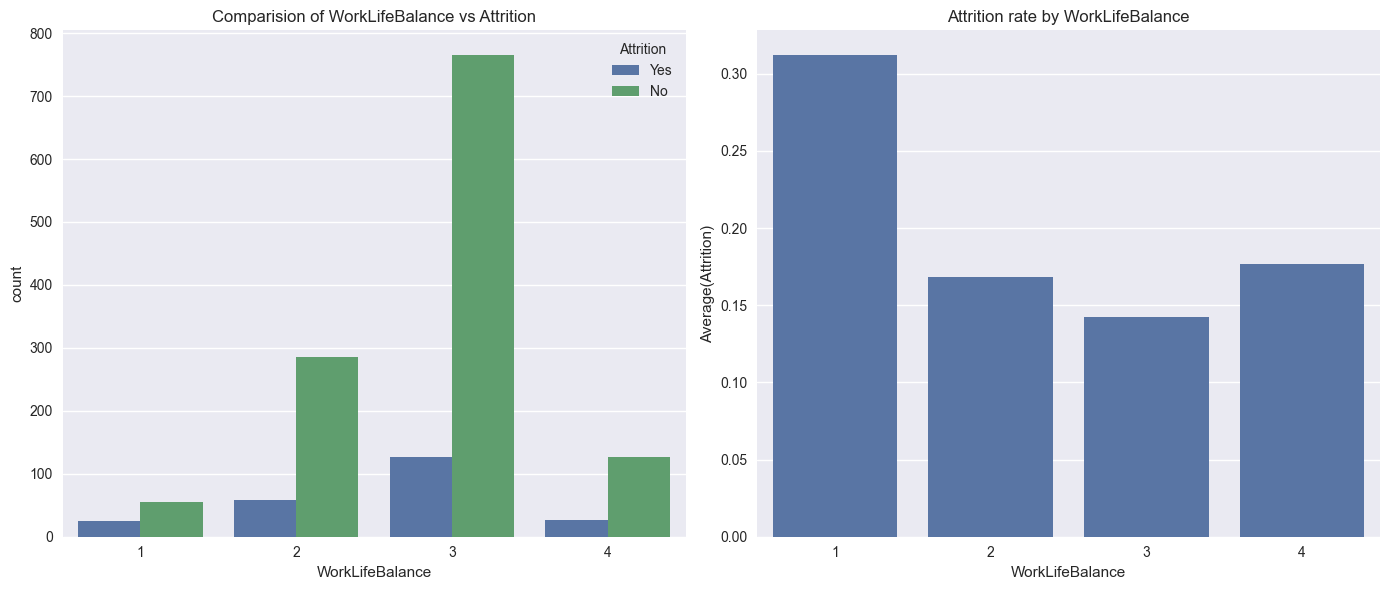

In [54]:
CategoricalVariables_targetPlots(employee_df,"WorkLifeBalance")

As expected more than 30% of the people who rated as Bad WorkLifeBalance have left the company and around 15% of the people who rated for Best WorkLifeBalance also left the company

##Rating 1 – Low: Represents employees who perform below expectations and need significant improvement.


##Rating 2 – Good: Indicates employees who meet basic expectations but still have scope for improvement.

##Rating 3 – Excellent: Refers to employees who consistently exceed expectations and are strong performers.

##Rating 4 – Outstanding: Denotes top performers who far exceed expectations and are often considered for promotions or leadership roles.

----------------OverTime---------------

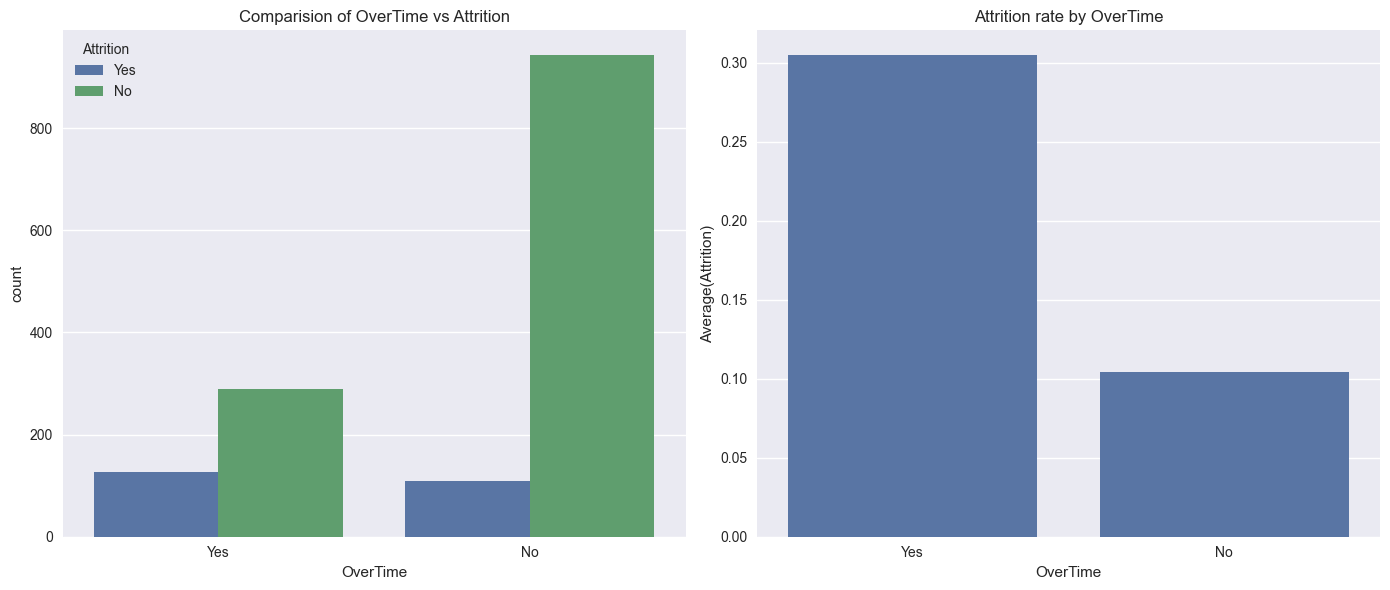

In [55]:
CategoricalVariables_targetPlots(employee_df,"OverTime")

More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime has not left the company. Therefore overtime is a strong indicator of attrition.

--------------------Business Travel----------------------

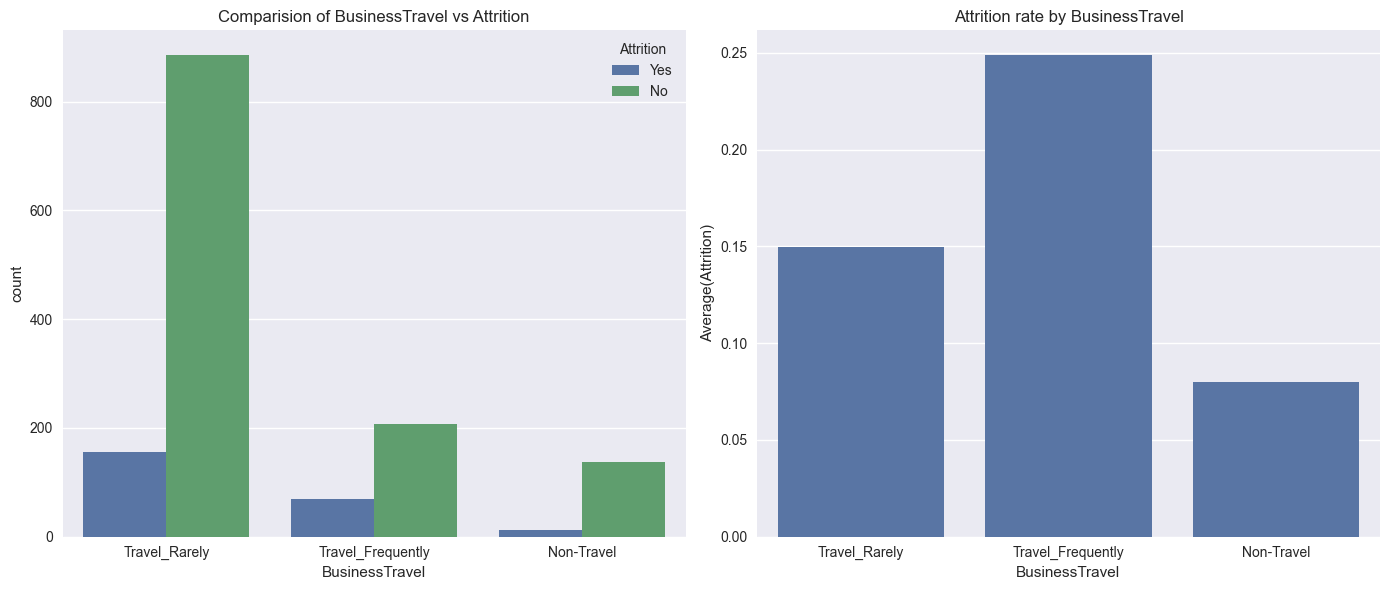

In [56]:
CategoricalVariables_targetPlots(employee_df,segment_by="BusinessTravel")

There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

--------------------------Department--------------------

In [57]:
employee_df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

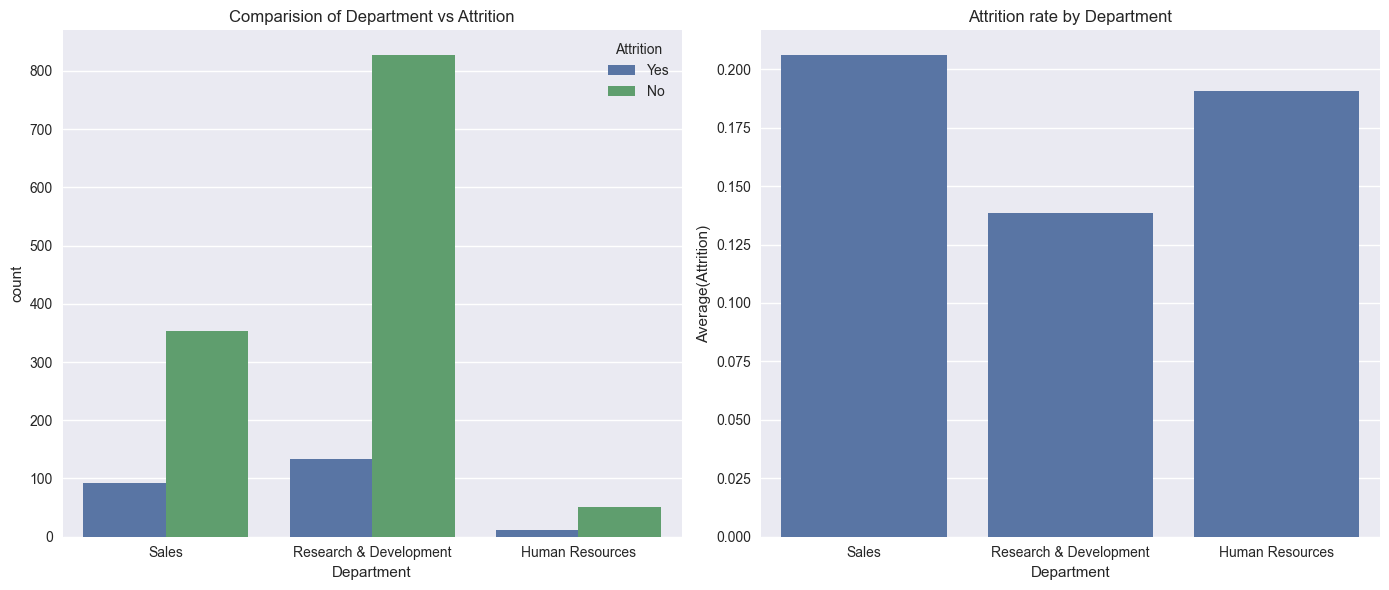

In [58]:
CategoricalVariables_targetPlots(employee_df,segment_by="Department")

##On comparing departmentwise,we can conclude that HR has seen only a marginal high in turnover rates whereas the numbers are significant in sales department with turnover rates of 39 %. The attrition levels are not appreciable in R & D where 67 % have recorded no attrition.

##Sales has seen higher attrition levels about 20.6% followed by HR around 18%

-------------------------EducationField-------------------------

In [59]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'left'],
      dtype='object')

In [60]:
employee_df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

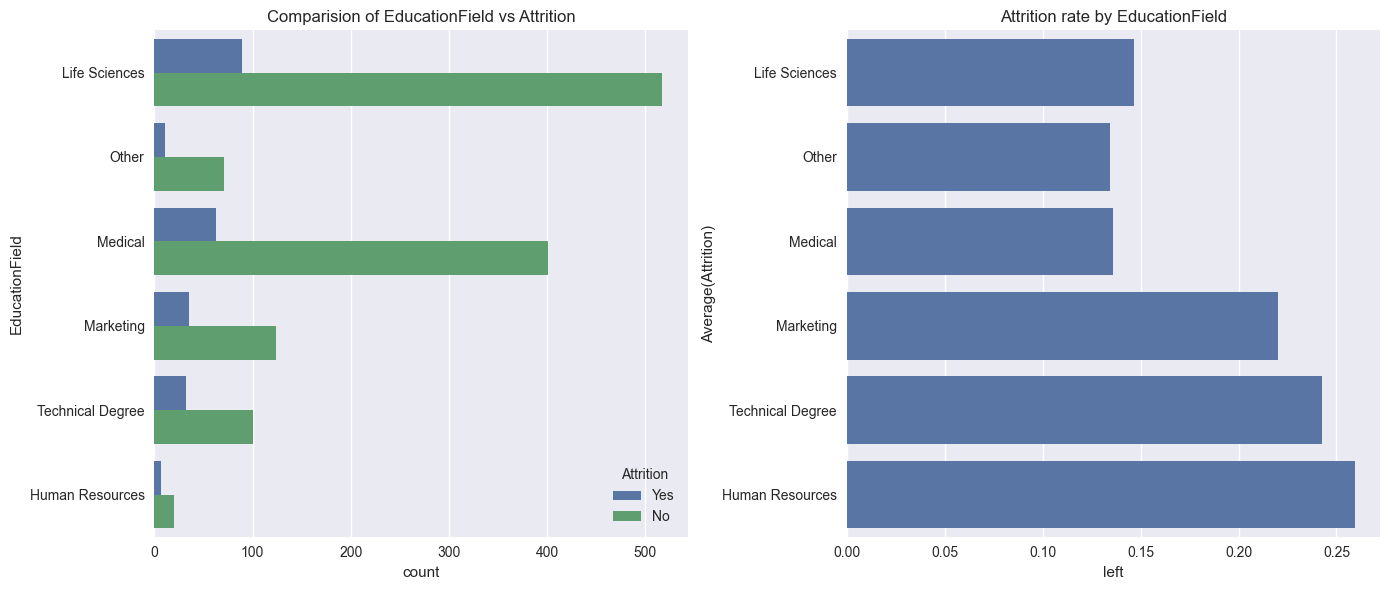

In [61]:
CategoricalVariables_targetPlots(employee_df,"EducationField",invert_axis=True)

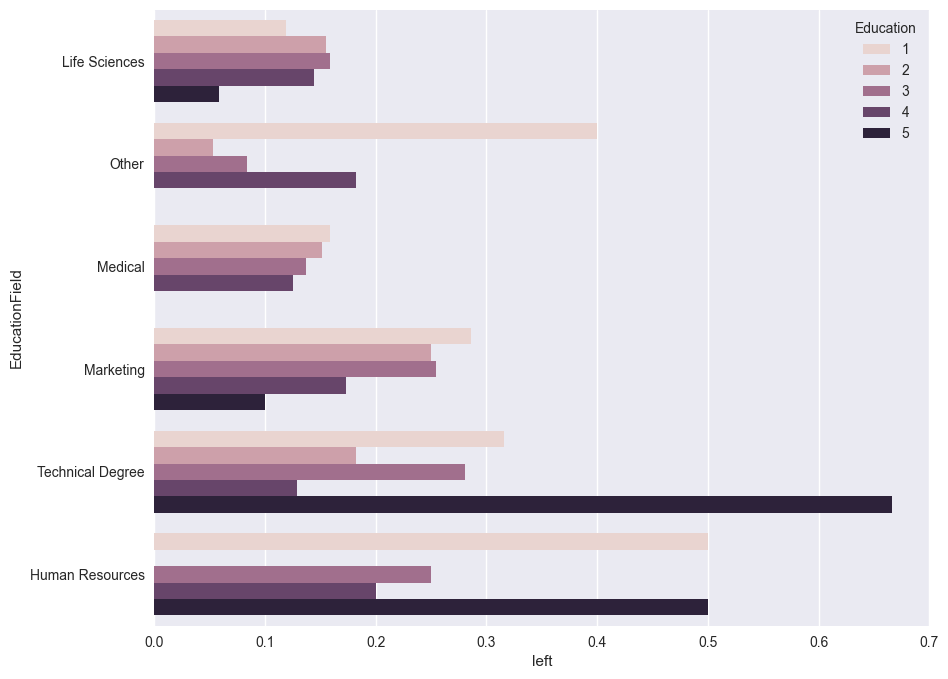

In [62]:
plt.figure(figsize=(10,8))
sns.barplot(y="EducationField",x="left",hue="Education",data=employee_df,ci=None)
plt.show()

##There are more people with a Life sciences followed by medical and marketing

##Employee's in the EducationField of Human Resources and Technical Degree have highest attrition levels around 26% and 23% 

##When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition

-----------------EnvironmentSatisfaction-----------------

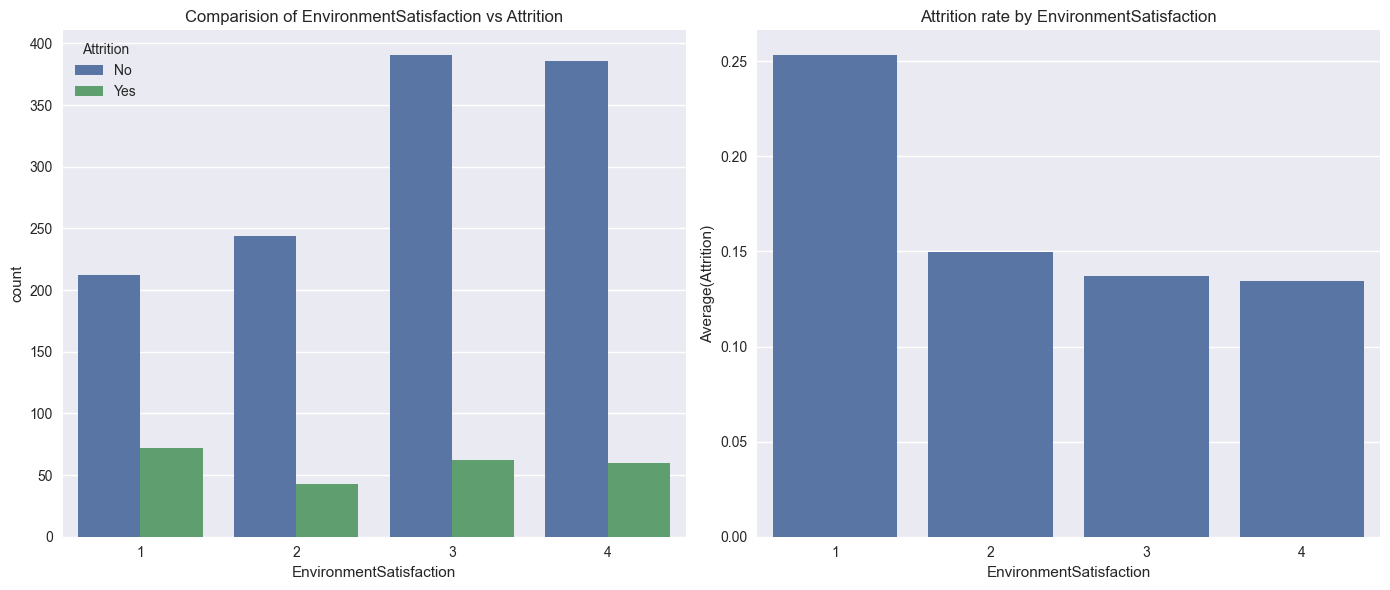

In [63]:
CategoricalVariables_targetPlots(employee_df,"EnvironmentSatisfaction")

we can see that people having low environment satisfaction 25% leave the company

-------------------------Gender Vs Attrition------------------------

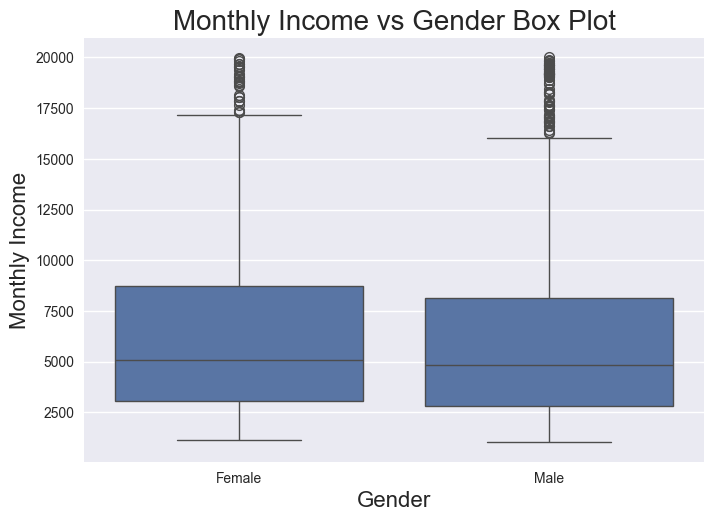

In [64]:
sns.boxplot(x='Gender', y='MonthlyIncome', data=employee_df)
plt.title('Monthly Income vs Gender Box Plot', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Monthly Income', fontsize=16)
plt.show()


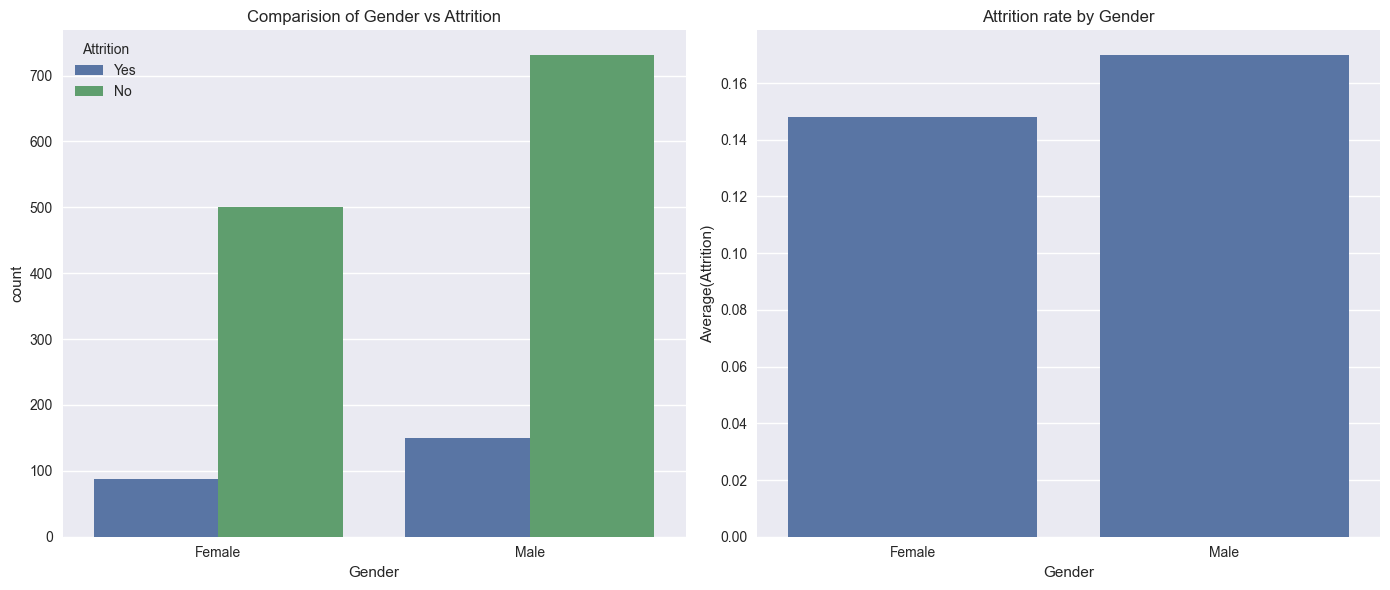

In [65]:
CategoricalVariables_targetPlots(employee_df,"Gender")

Monthly Income distribution for Male and Female is almost similar, so the attrition rate of Male and Female is almost the same around 15%. Gender is not a strong indicator of attrition

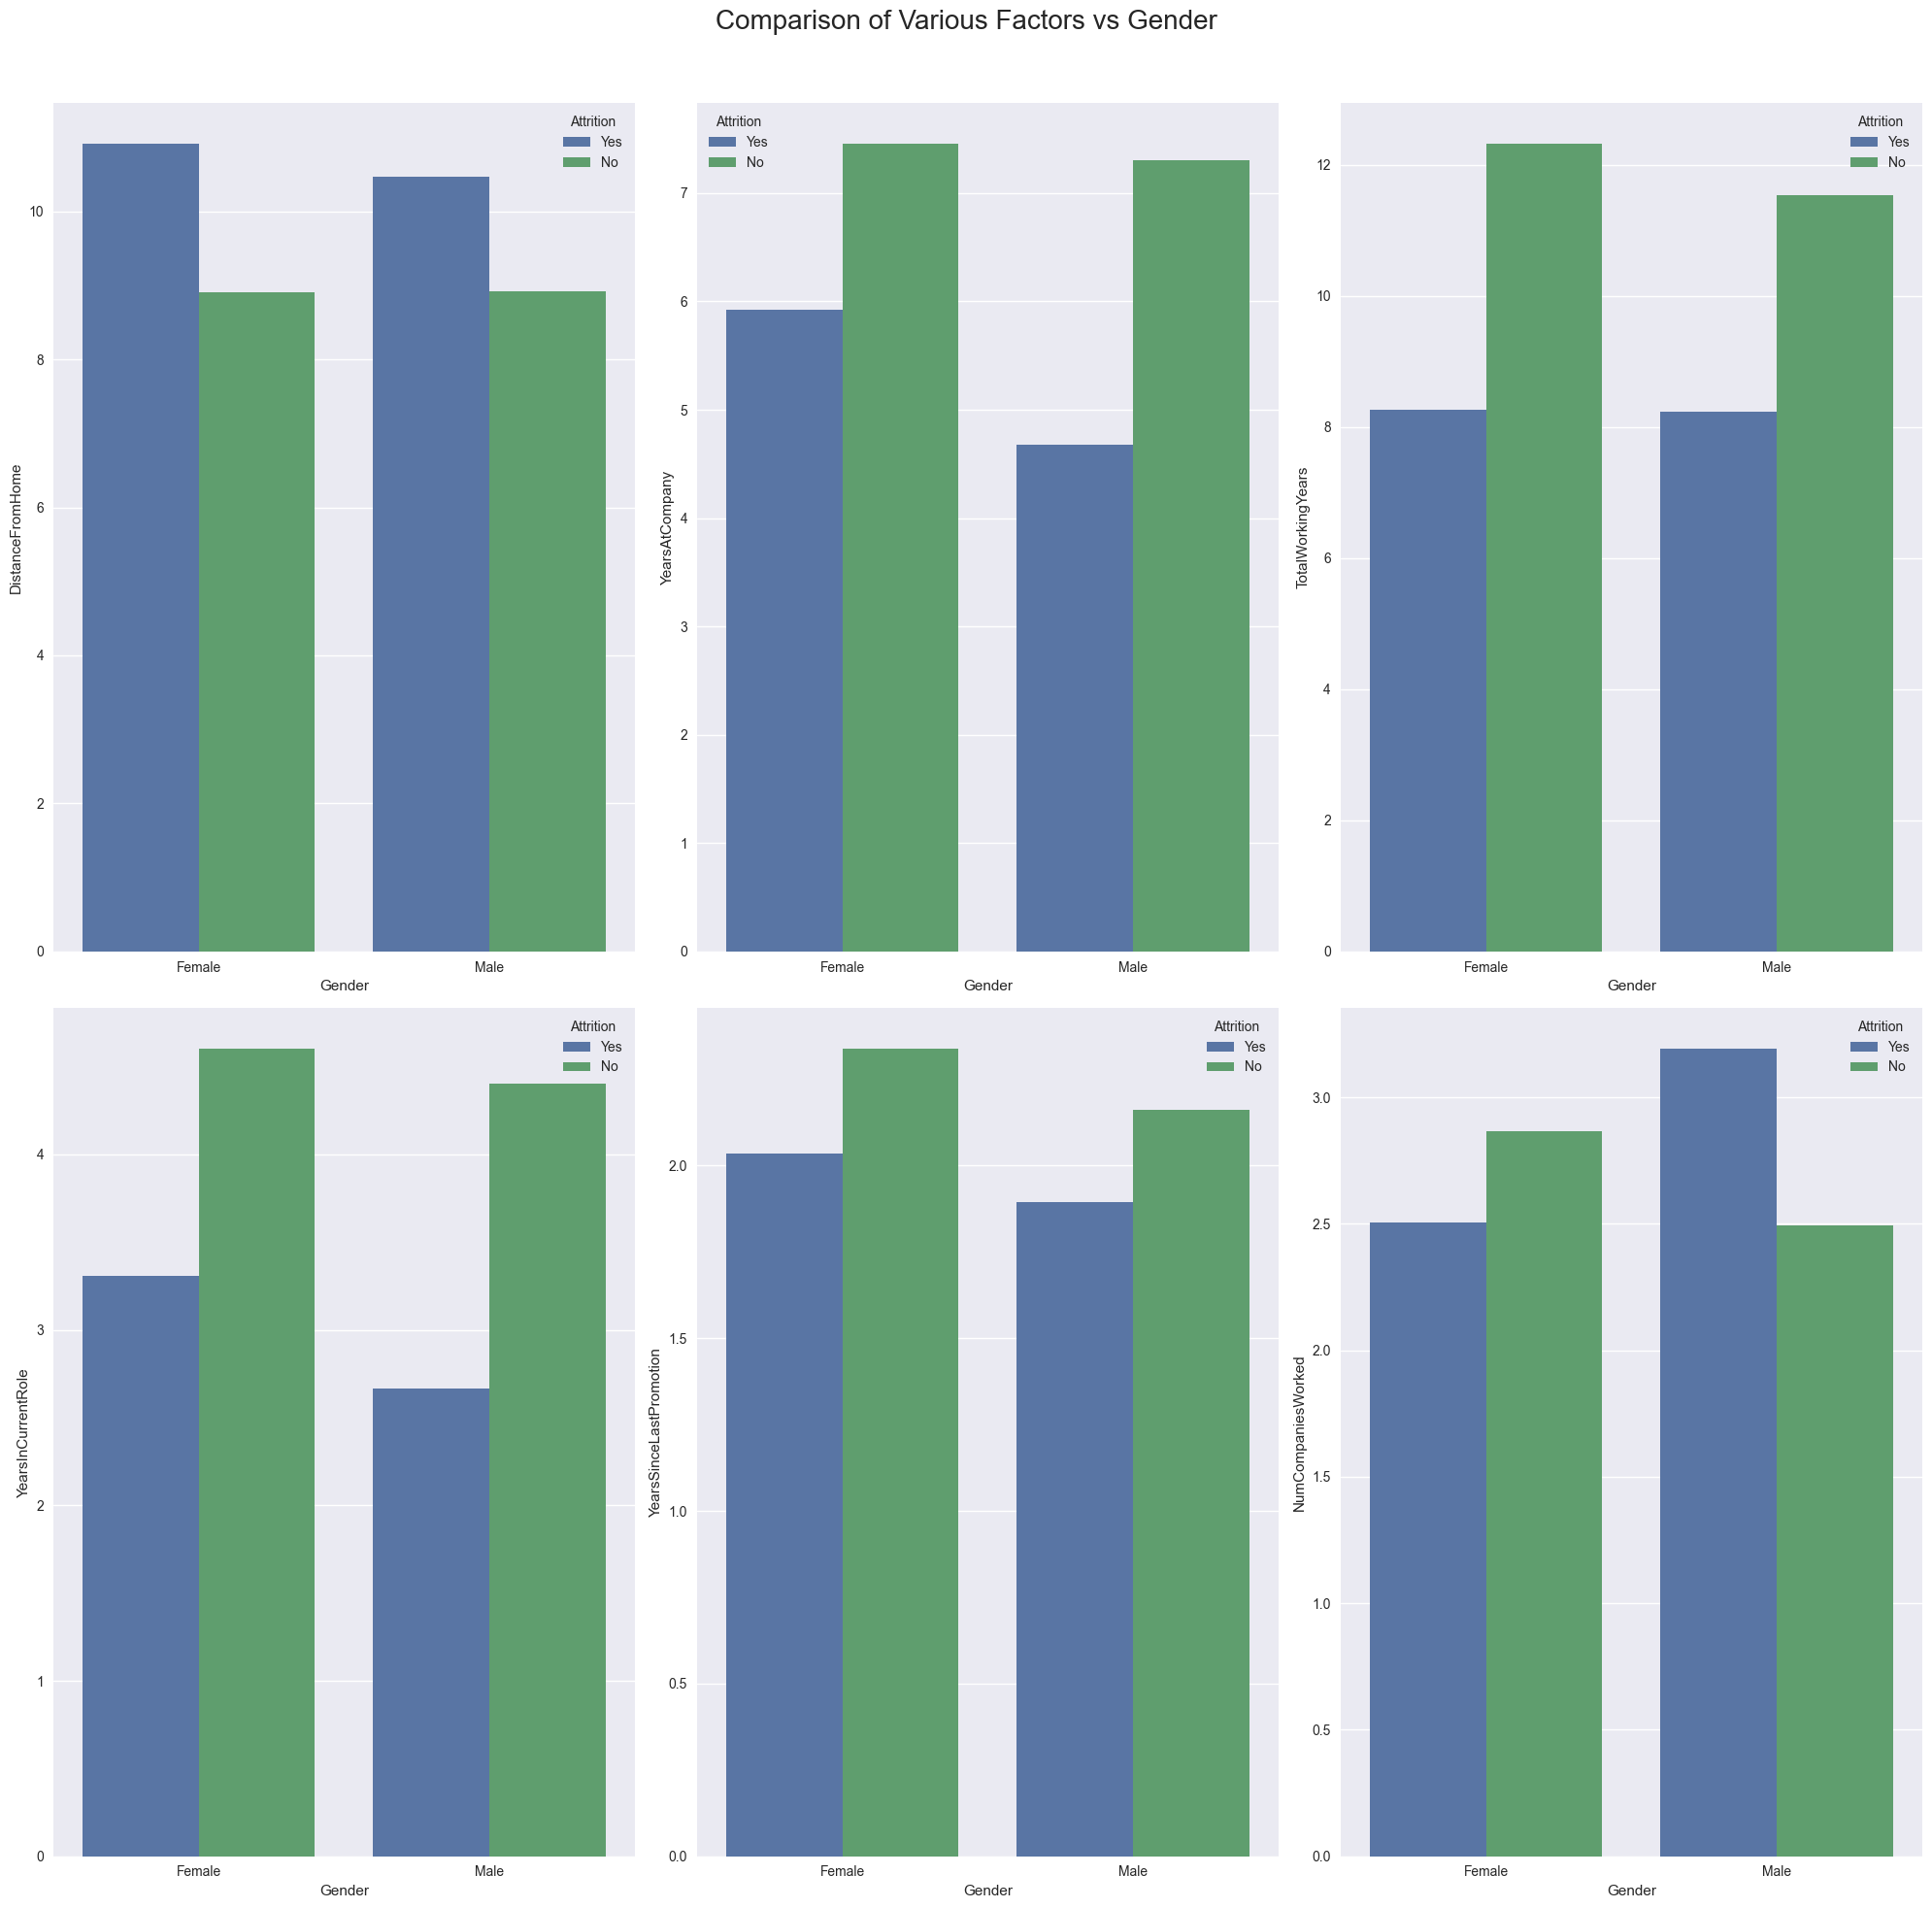

In [66]:
fig, ax = plt.subplots(2, 3, figsize=(20, 20))  # Create 2x3 grid of subplots
plt.suptitle("Comparison of Various Factors vs Gender", fontsize=20)

sns.barplot(x='Gender', y='DistanceFromHome', hue='Attrition', data=employee_df, ax=ax[0, 0], ci=None)
sns.barplot(x='Gender', y='YearsAtCompany', hue='Attrition', data=employee_df, ax=ax[0, 1], ci=None)
sns.barplot(x='Gender', y='TotalWorkingYears', hue='Attrition', data=employee_df, ax=ax[0, 2], ci=None)
sns.barplot(x='Gender', y='YearsInCurrentRole', hue='Attrition', data=employee_df, ax=ax[1, 0], ci=None)
sns.barplot(x='Gender', y='YearsSinceLastPromotion', hue='Attrition', data=employee_df, ax=ax[1, 1], ci=None)
sns.barplot(x='Gender', y='NumCompaniesWorked', hue='Attrition', data=employee_df, ax=ax[1, 2], ci=None)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##Distance from home matters to women employees more than men.
##Female employes are spending more years in one company compare to their counterpart.
##Female employes spending more years in current company are more inclined to switch.

-----------------------Job Role-------------------------------

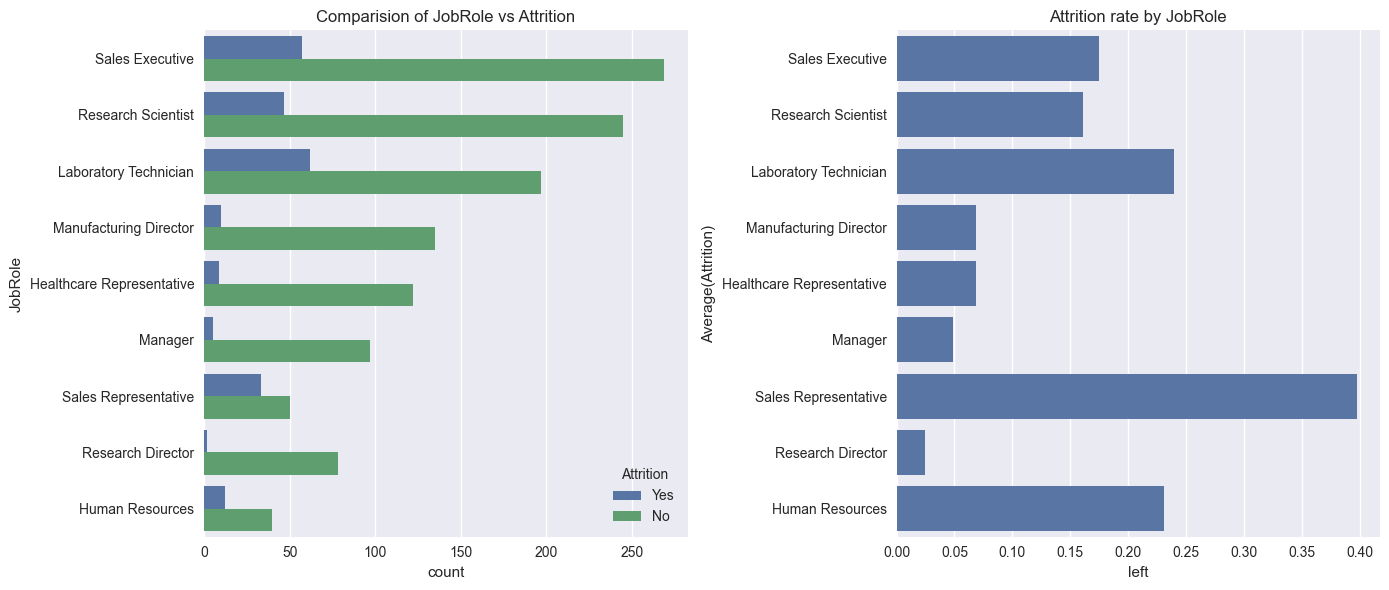

In [67]:
CategoricalVariables_targetPlots(employee_df,"JobRole",invert_axis=True)

##Jobs held by the employee is maximum in Sales Executive, then R&D , then Laboratory Technician

##People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates are 40%, 24% and 22% respectively

--------------------Marital Status--------------------------------

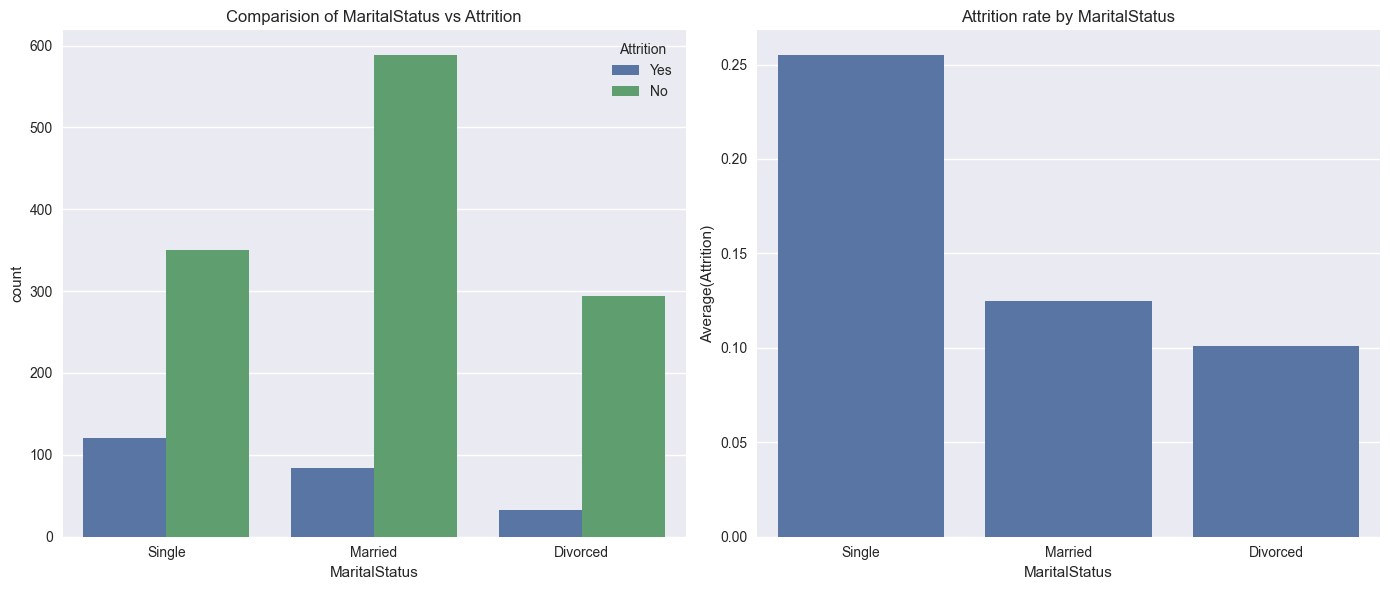

In [68]:
CategoricalVariables_targetPlots(employee_df,"MaritalStatus")

From the plot,it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is a weak predictor of attrition

Building Decision Tree

In [69]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrices
from sklearn import metrics

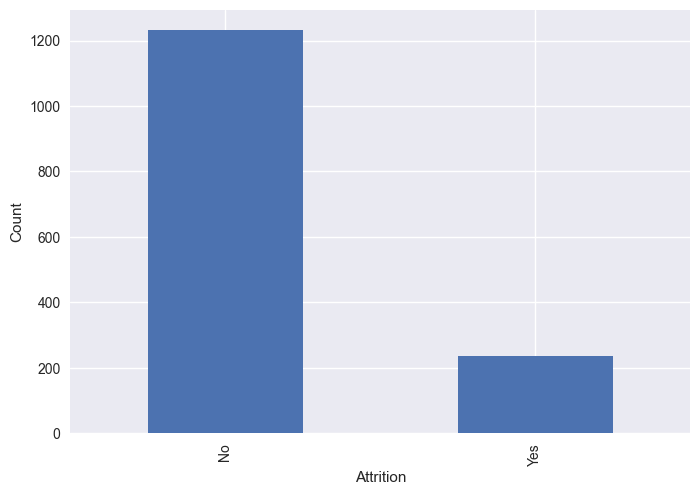

In [70]:
employee_df.Attrition.value_counts().plot(kind="bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [71]:
employee_df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64


From the Exploratory data analysis, variable that are not significant to attrition are:

EmployeeCount, EmployeeNumber, Gender, HourlyRate, JobLevel, MaritalStatus, Over18, StandardHours

In [72]:
#copying the main employee data to another data to another dataframe
employee_df_new=employee_df.copy()

In [73]:
employee_df_new.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'left'],
      dtype='object')

In [74]:
employee_df.shape

(1470, 36)

In [75]:
employee_df_new.shape

(1470, 36)

In [76]:
#dropping the features that are not significant for our analysis
employee_df_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"],axis=1,inplace=True)

In [77]:
employee_df_new.shape

(1470, 29)

In [78]:
employee_df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,3,...,3,4,1,6,3,3,2,2,2,2


Handling Categorical Variables
--Segregate the numerical and Categorical variables
--Convert Categorical variables to dummy variables

In [79]:
#data types of variables
dict(employee_df_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('int64'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [80]:
#segregating the variables based on datatypes
numeric_variables_names = [key for key in dict(employee_df_new.dtypes) if dict(employee_df_new.dtypes)[key] in ['float64','int64','float32','int32']]

categorical_variables_names=[key for key in dict(employee_df_new.dtypes) if dict(employee_df_new.dtypes)[key] in ['object']]

In [81]:
print("Categorical variables names")
categorical_variables_names

Categorical variables names


['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [82]:
print("Numerical variables names")
numeric_variables_names

Numerical variables names


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [83]:
#store the numerical variables data in seperate dataset
employee_data_num = employee_df_new[numeric_variables_names]

In [84]:
#store the categorical variables data in seperate datasets

employee_data_cat=employee_df_new[categorical_variables_names]

#dropping the attrition
employee_data_cat.drop(["Attrition"],axis=1,inplace=True)

In [85]:
#converting into dummy variables
employee_data_cat=pd.get_dummies(employee_data_cat)

In [86]:
#Merging the both numerical and categorical data
employee_data_final=pd.concat([employee_data_num,employee_data_cat,employee_df_new[["Attrition"]]],axis=1,)

In [87]:
employee_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,3,2,4,5993,19479,...,False,False,True,False,False,False,True,False,True,Yes
1,49,279,8,1,3,2,2,2,5130,24907,...,False,True,False,False,False,True,False,True,False,No
2,37,1373,2,2,4,2,1,3,2090,2396,...,False,False,False,False,False,False,True,False,True,Yes
3,33,1392,3,4,4,3,1,3,2909,23159,...,False,True,False,False,False,True,False,False,True,No
4,27,591,2,1,1,3,1,2,3468,16632,...,False,False,False,False,False,True,False,True,False,No


In [88]:
#final features
features = list(employee_data_final.columns.difference(["Attrition"]))

In [89]:
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'Education',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime_No',
 'OverTime_Yes',
 'PercentSalaryHike',
 'PerformanceRating',

----------------------Separating the Target and the Predictors-----------------

In [90]:
#seperating the target and predicators

X = employee_data_final[features]
y = employee_data_final[["Attrition"]]

In [91]:
X.shape

(1470, 48)

In [92]:
y.shape

(1470, 1)

------------------------Train-Test Split(Stratified Sampling of Y)---------------

In [93]:
#Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best
from sklearn.model_selection import GridSearchCV

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,stratify = y,random_state=100)

In [95]:
X_train.shape

(1029, 48)

In [96]:
y_train.shape

(1029, 1)

In [97]:
X_test.shape

(441, 48)

In [98]:
y_test.shape

(441, 1)

In [99]:
#Checks
#Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

Attrition
No     0.838678
Yes    0.161322
Name: count, dtype: float64

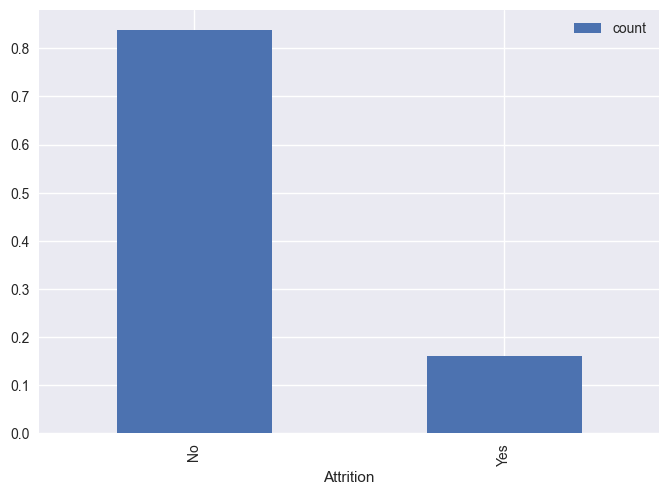

In [100]:
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind="bar")
plt.show()

In [101]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

Attrition
No     0.839002
Yes    0.160998
Name: count, dtype: float64

In [102]:
#make a pipeline for decision tree  model
pipelines={
    "clf" : make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

------------------------------------Cross Validate-------------------------------

cross validate : to check the accuracy of the pipeline

In [103]:
scores=cross_validate(pipelines['clf'],X_train,y_train,return_train_score=True)

In [104]:
scores['test_score'].mean()

0.8396590101823348

Average accuracy of pipeline with Decision Tree Classifier is 83.48%

-----------------------Cross-Validation and Hyper Parameters Tuning-------

Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters . Declare a hyper-parameters to fine tune the Decision Tree Classifier


Decision Tree is a greedy alogritum it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree

In [105]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}


In [106]:
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

------------------Decision Tree classifier with gini index-----------------------

------------------Fit and tune models with cross-validation-------------------------
Now that we have our pipelines and hyperparameters dictionaries declared, we're ready to tune our models with cross-validation.we are doing 5 fold cross validation.

In [107]:
#Create a cross validation object from decision tree classifier and it's hyperparameters
clf_model = GridSearchCV(pipelines['clf'],decisiontree_hyperparameters,cv=5,n_jobs=-1)


In [108]:
#fit the model with train_data
clf_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [109]:
#Dispaly the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 7,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 10}

In [ ]:
#Display the best score for the fitted model
clf_model.best_score_

0.8561780724603363

In [110]:
#In pipeline we can use the string names to get the decisiontreeclassifer
clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=3, max_features=7, min_samples_split=10,
                       random_state=100)

In [111]:
#saving into a variable to get graph
clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

------------Model Performance Evaluation---------
On test data

In [112]:
#making a dataframe of actual and predicated data from test set
tree_test_pred = pd.concat([y_test.reset_index(drop=True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns =["actual", "predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [113]:
tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [114]:
#keeping only positive condition (yes for attrition)
pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns=["predicted_prob"]
pred_probability.index=y_test.index


In [115]:
#merging the predicated data and its probability value
tree_test_pred = pd.concat([tree_test_pred , pred_probability] , axis=1)

In [116]:
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,0.632184
1432,No,No,0.220859
334,No,No,0.072165
1068,Yes,No,0.145985
736,No,No,0.072165


In [117]:
#converting the Labels Yes --> 1 and No --> 0 for further operations below
tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes" , 1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes" , 1,0)

In [118]:
tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,0.632184,1,1
1432,No,No,0.220859,0,0
334,No,No,0.072165,0,0
1068,Yes,No,0.145985,1,0
736,No,No,0.072165,0,0


--------------------Confusion Matrix-----------------------
The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [119]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 21,  50],
       [ 26, 344]], dtype=int64)

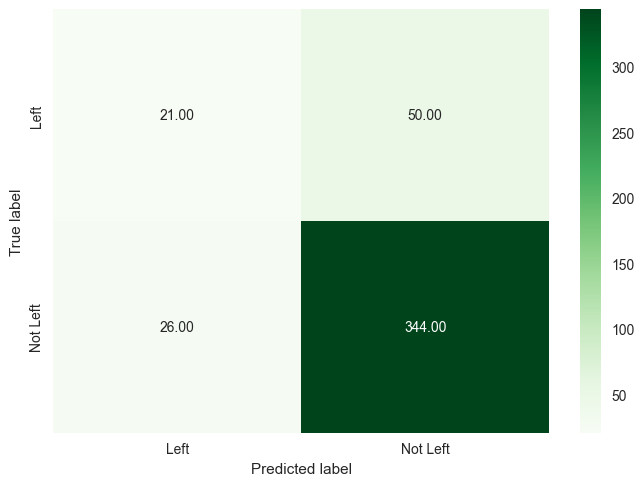

In [120]:
#confusion matrix visualization using seaborn heatmap
sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [121]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.6128


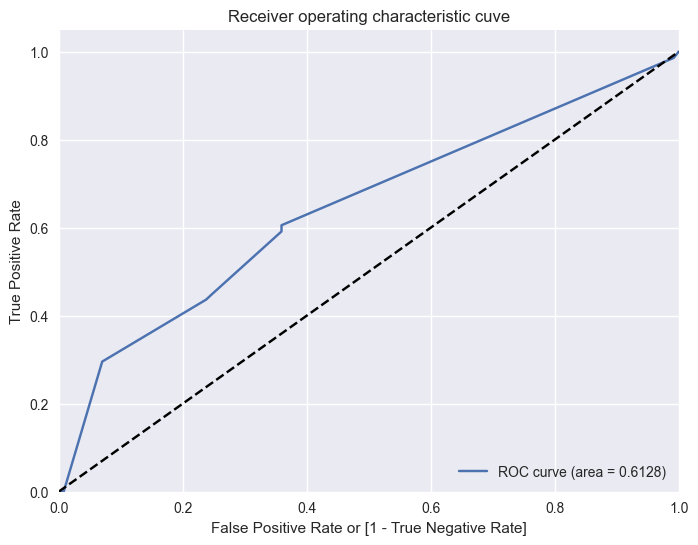

In [122]:
#Area under ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()

From the ROC Curve, we have a choice to make depending on the value we place on true positive and tolerance for false positive rate.If we wish to find the more people who are leaving, we could increase the true positive rate by adjusting the probability cutoff for classification. However by doing so would also increase the false positive rate. we need to find the optimum value of cutoff for classification

------------------Metrics--------------------------


--Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized


--Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive.


In [123]:
#calculating the recall score
print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))


Recall Score: 29.577


In [124]:
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Precision Score: 44.681


In [125]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       370
           1       0.45      0.30      0.36        71

    accuracy                           0.83       441
   macro avg       0.66      0.61      0.63       441
weighted avg       0.80      0.83      0.81       441

